## Feature Selection & Dimension Reduction


## 1. Introduction

The data set is comprised of 39,797 observations and 61 attributes. This
study will build a regression model to predict the response variable, which is shares. To create an accurate model, we will apply dimensionality reduction expertise to the remaining 
60 attributes to select the most valuable variables to predict responsible variables. 

Here are the steps: 
1. Load Data.
2. Data Preparation: check the data types and if the null value exists.
3. Exploratory Data Analysis (EDA)
4. Dimensionality Reduction(PCA)
5. Model Training + Selection + Testing: Linear Regression Model Construction + K-Fold Cross-Validation.
6. Conclusions.










### Data Preparation   

In [1]:
# Load all the libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Start by reading a set of sample data from github. This data set contains information related to automobile.
df = pd.read_csv("https://raw.githubusercontent.com/sczhou0705/DAV-6150-2/main/M4_Data.csv")

df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [3]:
df.shape

(39644, 61)

## 2. Exploratory Data Analysis & Data Cleaning

In [4]:
# Drop non-predictive variables
df = df.drop(df.columns[[0,1]],axis=1)
df.head(1)

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   

    num_videos   average_token_length  ...   min_positive_polarity  \
0          0.0               4.680365  ...                     0.1   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7                   -0.35                    -0.6   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0                    -0.2                  0.5                    -0.1875   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                      0.0                         0.1875      593  

[1 rows x 59 columns]

In [5]:
# Double check the shape
df.shape

(39644, 59)

In [6]:
df.describe()

n_tokens_title   n_tokens_content   n_unique_tokens  \
count     39644.000000       39644.000000      39644.000000   
mean         10.398749         546.514731          0.548216   
std           2.114037         471.107508          3.520708   
min           2.000000           0.000000          0.000000   
25%           9.000000         246.000000          0.470870   
50%          10.000000         409.000000          0.539226   
75%          12.000000         716.000000          0.608696   
max          23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

       ...   min_positive_polarity   max_positive_polarity  \
count  ...            39644.000000            39644.000000   
mean   ...                0.095446                0.756728   
std    ...                0.071315                0.247786   
min    ...                0.000000                0.000000   
25%    ...                0.050000                0.600000   
50%    ...                0.100000                0.800000   
75%    ...                0.100000                1.000000   
max    ...                1.000000                1.000000   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                -0.259524               -0.521944               -0.107500   
std                  0.127726                0.290290                0.095373   
min                 -1.000000               -1.000000               -1.000000   
25%                 -0.328383               -0.700000               -0.125000   
50%                 -0.253333               -0.500000               -0.100000   
75%                 -0.186905               -0.300000               -0.050000   
max                  0.000000                0.000000                0.000000   

        title_subjectivity   title_sentiment_polarity  \
count         39644.000000               39644.000000   
mean              0.282353                   0.071425   
std               0.324247                   0.265450   
min               0.000000                  -1.000000   
25%               0.000000                   0.000000   
50%               0.150000                   0.000000   
75%               0.500000                   0.150000   
max               1.000000                   1.000000   

        abs_title_subjectivity   abs_title_sentiment_polarity         shares  
count             39644.000000                   39644.000000   39644.000000  
mean                  0.341843                       0.156064    3395.380184  
std                   0.188791                       0.226294   11626.950749  
min  

The below three columns have negative values. We regard these negative values as unreasonable because the length of keywords can not be less than zero. So we drop the invalid data values.

For avg_negative_polarity, min_negative_polarity, max_negative_polarity, title_sentiment_polarity, global_sentiment_polarity, they also have negative variables, but we do not drop them because they are produced from NLP sentiment analysis.

In [7]:
# Drop the invalid data values, which are the negative value in kw_min_min, kw_avg_min, and kw_min_avg. 
df1 = np.where((df[' kw_min_min'] >= 0) & (df[' kw_avg_min'] >= 0) & (df[' kw_min_avg'] >= 0 ))
df = df.loc[df1]
df

n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
23088             12.0              820.0          0.452645   
23257             10.0              232.0          0.495370   
23325             10.0              293.0          0.582734   
23691              7.0              328.0          0.640678   
24284             13.0              315.0          0.583039   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
23088                1.0                   0.607422        11.0   
23257                1.0                   0.470930        18.0   
23325                1.0                   0.691892        17.0   
23691                1.0                   0.670833        34.0   
24284                1.0                   0.660099        47.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length  ...  \
0                  2.0        1.0          0.0               4.680365  ...   
1                  1.0        1.0          0.0               4.913725  ...   
2                  1.0        1.0          0.0               4.393365  ...   
3                  0.0        1.0          0.0               4.404896  ...   
4                 19.0       20.0          0.0               4.682836  ...   
...                ...        ...          ...                    ...  ...   
23088              3.0        1.0          0.0               5.191463  ...   
23257              2.0       15.0          0.0               4.642241  ...   
23325              6.0        0.0         11.0               4.873720  ...   
23691              3.0       31.0          0.0               5.341463  ...   
24284              2.0       29.0          0.0               4.904762  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                    0.100000                     0.7               -0.350000   
1                    0.033333                     0.7               -0.118750   
2                    0.100000                     1.0               -0.466667   
3                    0.136364                     0.8               -0.369697   
4                    0.033333                     1.0               -0.220192   
...                       ...                     ...                     ...   
23088                0.050000                     0.8               -0.316667   
23257                0.200000                     0.5               -0.504167   
23325                0.100000                     0.6               -0.285000   
23691                0.300000                     1.0               -0.482500   
24284                0.333333                     0.5               -0.465556   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                      -0.600               -0.200000             0.500000   
1                      -0.125               -0.100000             0.000000   
2                      -0.800               -0.133333             0.000000   
3                      -0.600               -0.166667             0.000000   
4                      -0.500               -0.050000             0.454545   
...                       ...                     ...               

In [8]:
# Check the missing value for each column
df.isnull().sum().sort_values(ascending=False)/(len(df))*100

 shares                           0.0
 data_channel_is_socmed           0.0
 self_reference_min_shares        0.0
 kw_avg_avg                       0.0
 kw_max_avg                       0.0
 kw_min_avg                       0.0
 kw_avg_max                       0.0
 kw_max_max                       0.0
 kw_min_max                       0.0
 kw_avg_min                       0.0
 kw_max_min                       0.0
 kw_min_min                       0.0
 data_channel_is_world            0.0
 data_channel_is_tech             0.0
 data_channel_is_bus              0.0
 self_reference_avg_sharess       0.0
 data_channel_is_entertainment    0.0
 data_channel_is_lifestyle        0.0
 num_keywords                     0.0
 average_token_length             0.0
 num_videos                       0.0
 num_imgs                         0.0
 num_self_hrefs                   0.0
 num_hrefs                        0.0
 n_non_stop_unique_tokens         0.0
 n_non_stop_words                 0.0
 n_unique_to

In [9]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16664 entries, 0 to 24284
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 16664 non-null  float64
 1    n_tokens_content               16664 non-null  float64
 2    n_unique_tokens                16664 non-null  float64
 3    n_non_stop_words               16664 non-null  float64
 4    n_non_stop_unique_tokens       16664 non-null  float64
 5    num_hrefs                      16664 non-null  float64
 6    num_self_hrefs                 16664 non-null  float64
 7    num_imgs                       16664 non-null  float64
 8    num_videos                     16664 non-null  float64
 9    average_token_length           16664 non-null  float64
 10   num_keywords                   16664 non-null  float64
 11   data_channel_is_lifestyle      16664 non-null  float64
 12   data_channel_is_entertainment  

### Scatter Plot

<ipython-input-10-93f03efd8a3f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 1,figsize=(6,4))


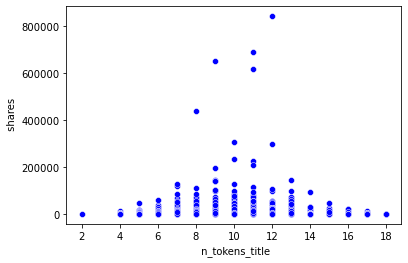

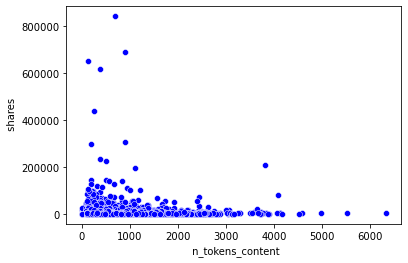

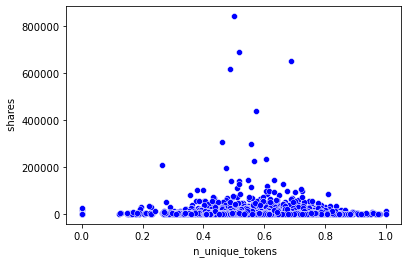

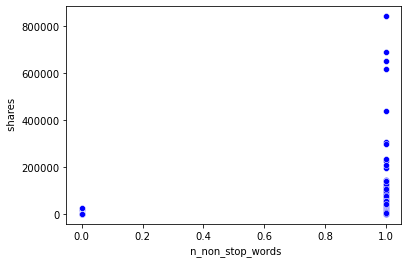

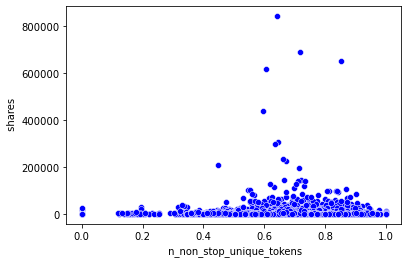

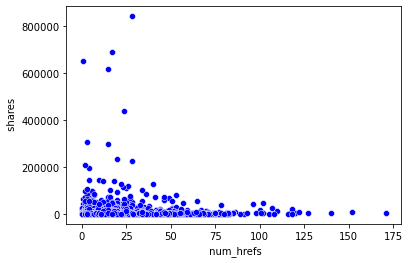

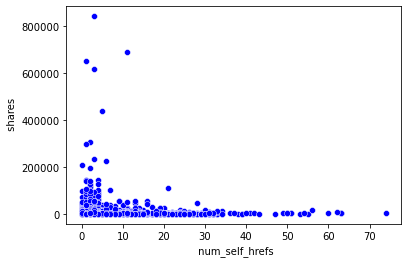

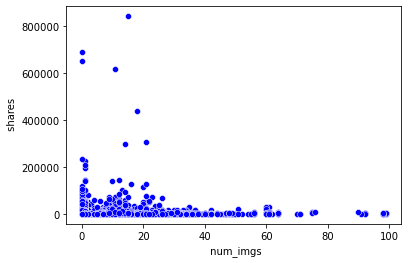

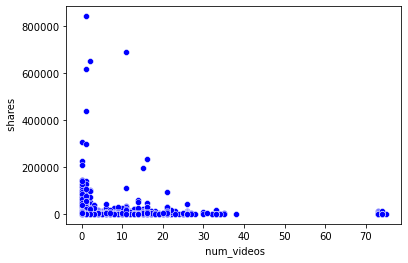

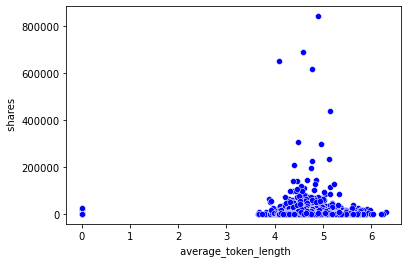

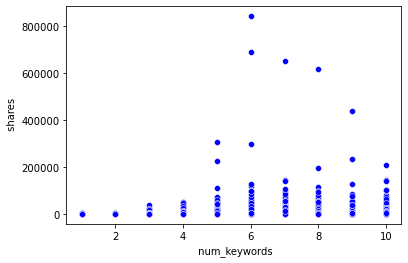

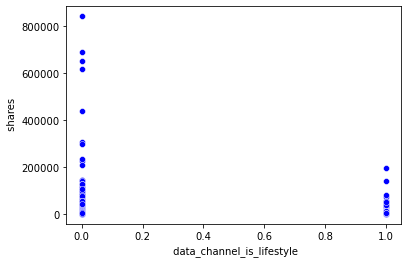

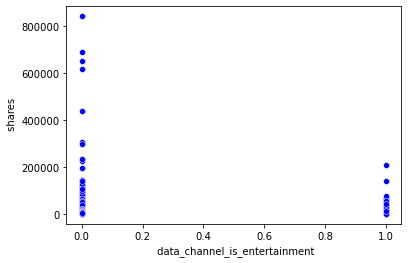

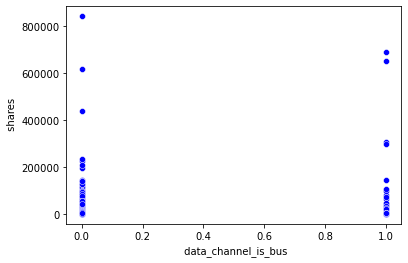

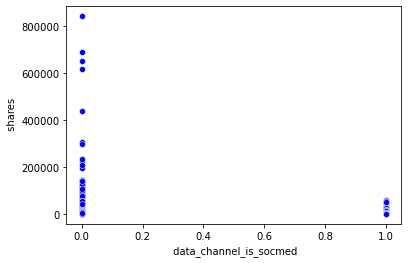

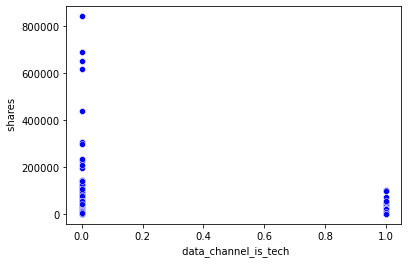

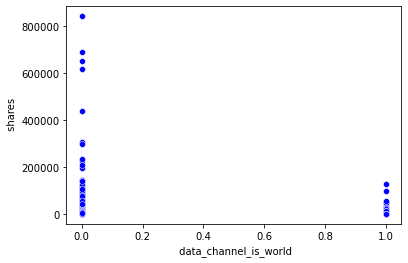

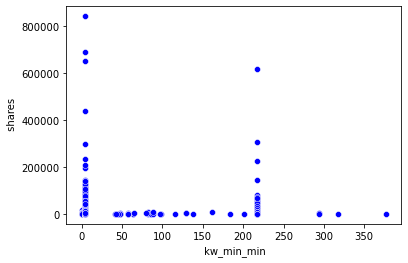

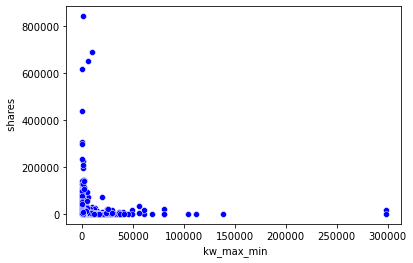

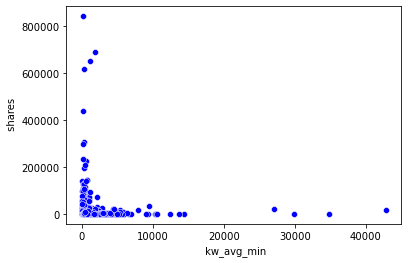

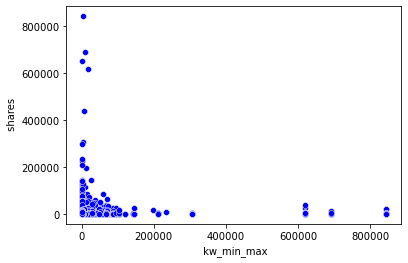

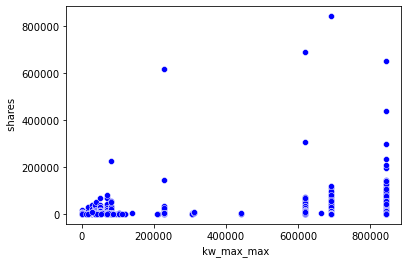

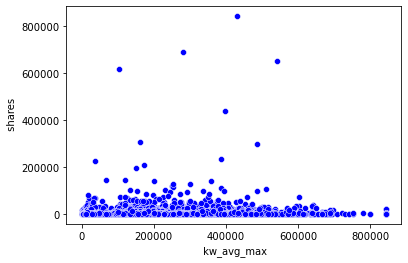

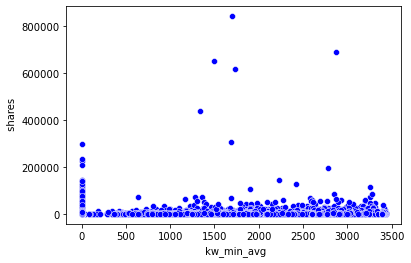

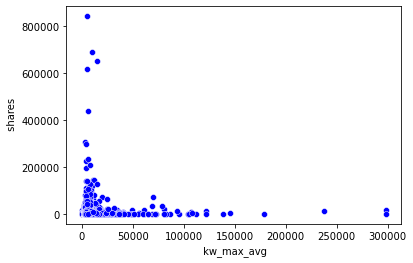

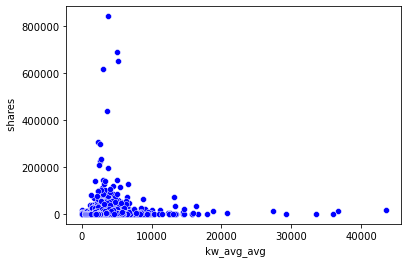

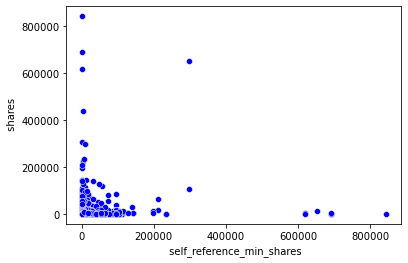

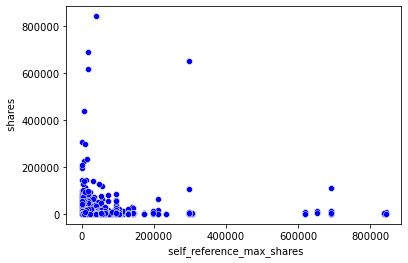

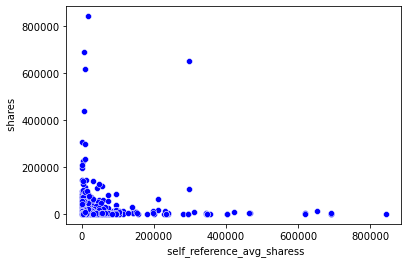

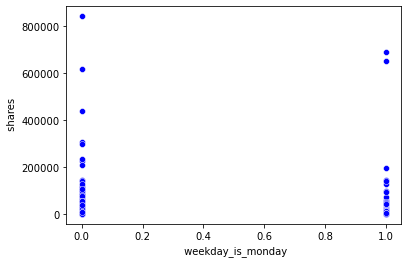

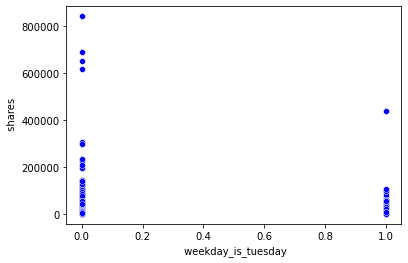

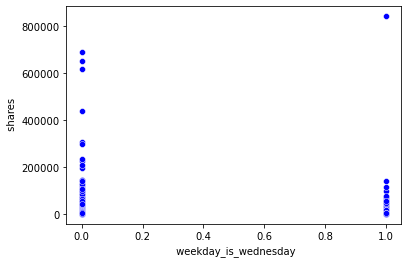

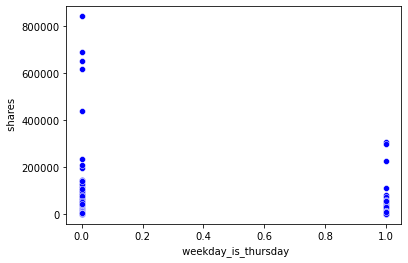

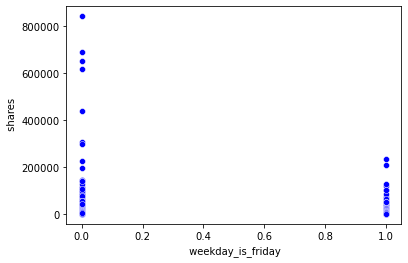

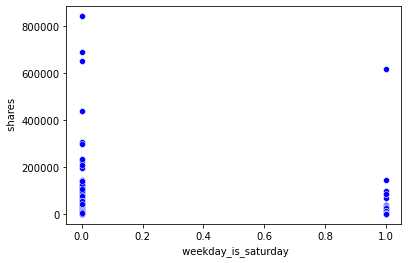

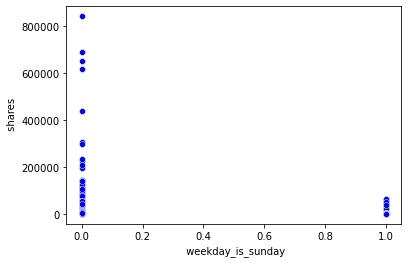

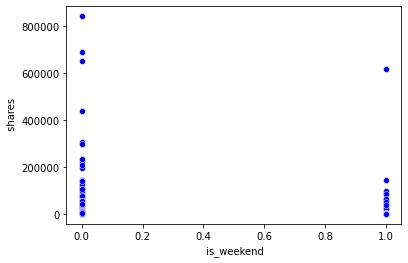

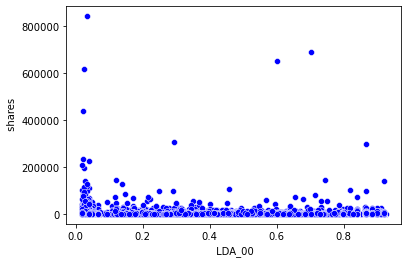

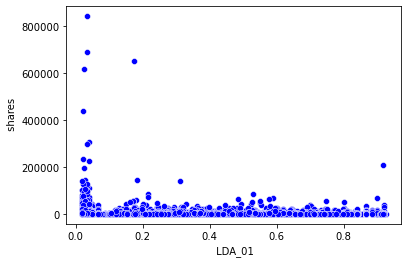

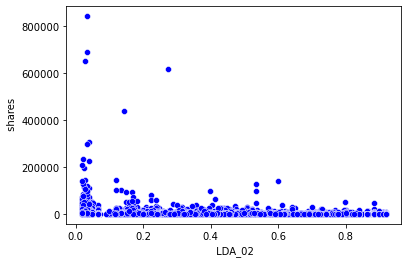

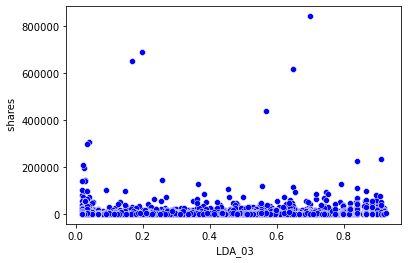

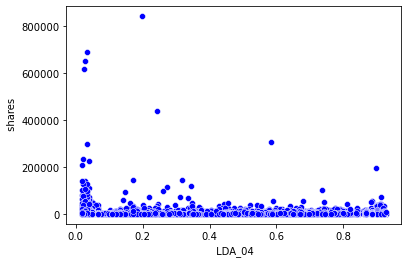

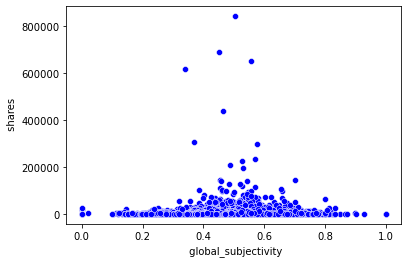

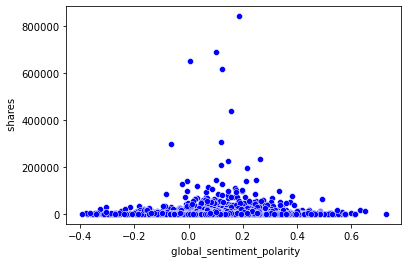

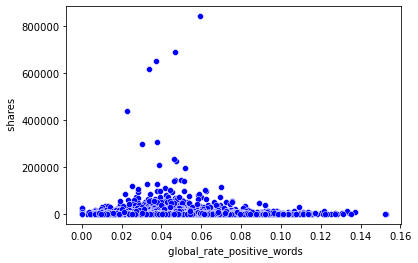

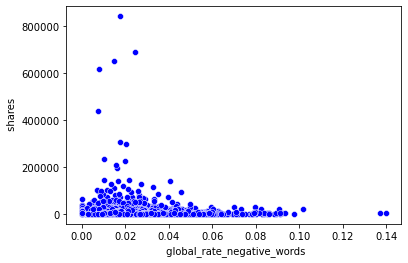

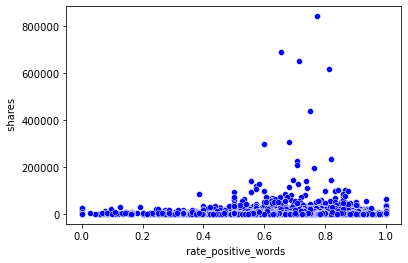

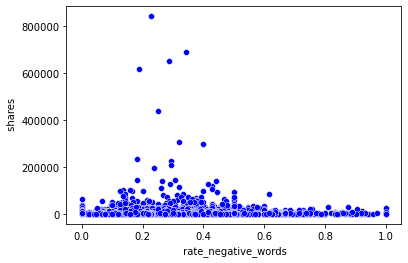

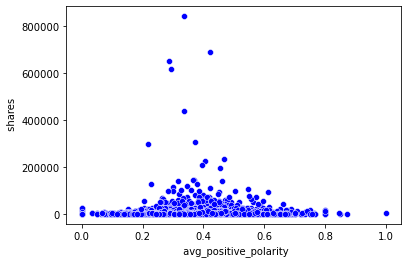

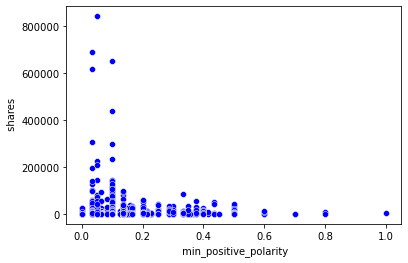

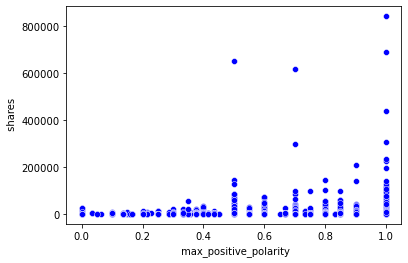

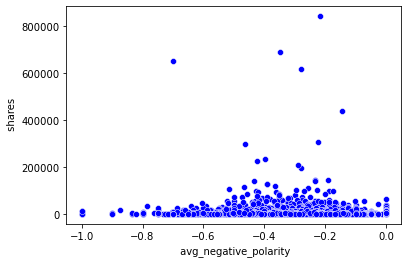

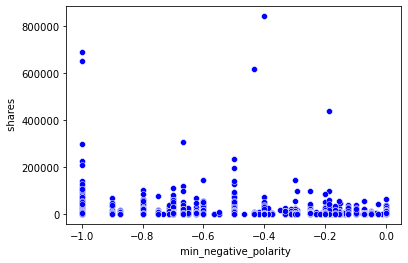

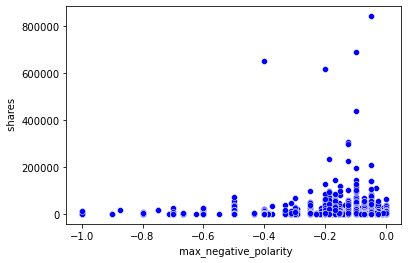

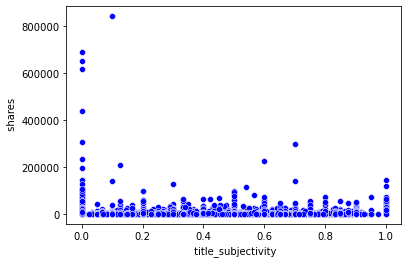

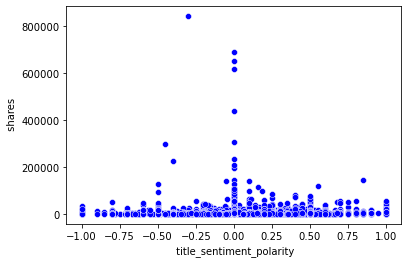

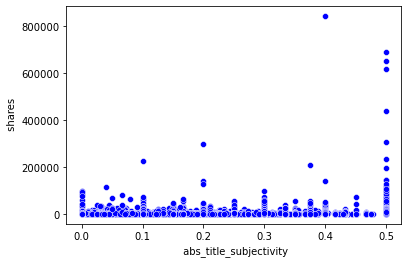

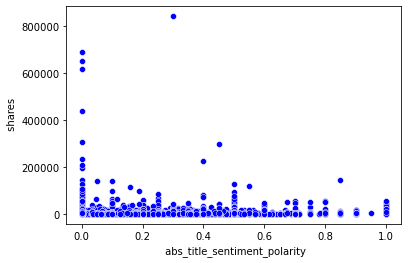

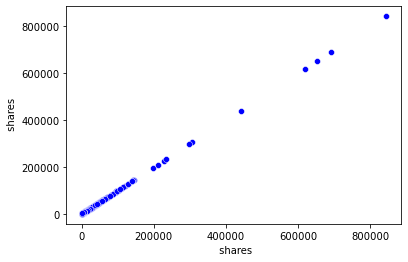

In [10]:
# Scatter plot
for col in df.columns:
    fig, axes = plt.subplots(1, 1,figsize=(6,4))
    sns.scatterplot(x = col, y = ' shares', data=df, color ="b")


In [11]:
# Detect what the relationship between explainable variables and response variable.
df.corr()[' shares']

 n_tokens_title                   0.003401
 n_tokens_content                 0.019212
 n_unique_tokens                 -0.004433
 n_non_stop_words                 0.001881
 n_non_stop_unique_tokens        -0.009239
 num_hrefs                        0.045652
 num_self_hrefs                   0.000731
 num_imgs                         0.033115
 num_videos                       0.027794
 average_token_length            -0.000169
 num_keywords                    -0.002065
 data_channel_is_lifestyle        0.004391
 data_channel_is_entertainment   -0.018451
 data_channel_is_bus             -0.011386
 data_channel_is_socmed           0.005745
 data_channel_is_tech            -0.018446
 data_channel_is_world           -0.034127
 kw_min_min                      -0.001895
 kw_max_min                       0.016779
 kw_avg_min                       0.018291
 kw_min_max                       0.005510
 kw_max_max                       0.012057
 kw_avg_max                       0.042200
 kw_min_avg

From the above results, we can find that the correlation between explainable variables and response variable is weak. We will do some dimensionality reduction in further study to help build the regression model.

#### Response variable analysis 

In [12]:
# Responsable variable
df_res=df[' shares']
df_res

0         593
1         711
2        1500
3        1200
4         505
         ... 
23088     798
23257    2400
23325    1200
23691    6500
24284    2200
Name:  shares, Length: 16664, dtype: int64

(array([10470.,  3357.,  1109.,   533.,   278.,   205.,   134.,   104.,
          100.,    58.]),
 array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000., 20000.]),
 <BarContainer object of 10 artists>)

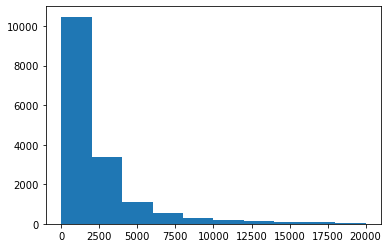

In [13]:
# Histogram of "Shares"
plt.hist(data=df, x=" shares",range = (0,20000),bins = 10)

The above histogram is right-skewed. 

- Binning the response variable "shares"

<ipython-input-14-a82beb34e5f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['bin_shares'] = pd.cut(df_res, bins=[0,946,2800,843300],labels=[1,2,3])


[Text(0, 0, 'popular'), Text(1, 0, 'unpopular'), Text(2, 0, 'super popular')]

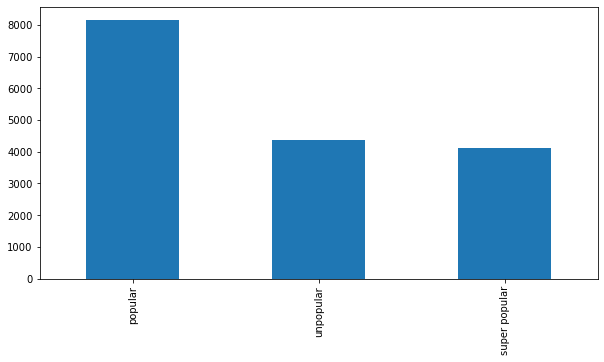

In [14]:
# 1 = unpopular; 2=popular; 3 = super popular
# 946 means 25% of the dataset
df_res['bin_shares'] = pd.cut(df_res, bins=[0,946,2800,843300],labels=[1,2,3])
# Make barplot
plt.figure(figsize=(10, 5))
fig = df_res['bin_shares'].value_counts().plot.bar()
x_labels = ['popular','unpopular','super popular']
fig.set_xticklabels(x_labels)

#### Divide explanatory variables into two categories: numerical and categorical variables
- Numerical data analysis

In [15]:
# Spilt numercial data from dataframe 
df_a = df[df.columns[0:11]]
df_b = df[df.columns[17:29]]
df_c = df[df.columns[37:58]]
df_num = pd.concat([df_a,df_b,df_c],axis = 1)
df_num.head(1)

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   

    num_videos   average_token_length  ...   avg_positive_polarity  \
0          0.0               4.680365  ...                0.378636   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                     0.1                     0.7                   -0.35   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                    -0.6                    -0.2                  0.5   

    title_sentiment_polarity   abs_title_subjectivity  \
0                    -0.1875                      0.0   

    abs_title_sentiment_polarity  
0                         0.1875  

[1 rows x 44 columns]

<ipython-input-16-2f1acb8738ce>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2,figsize=(14,4))


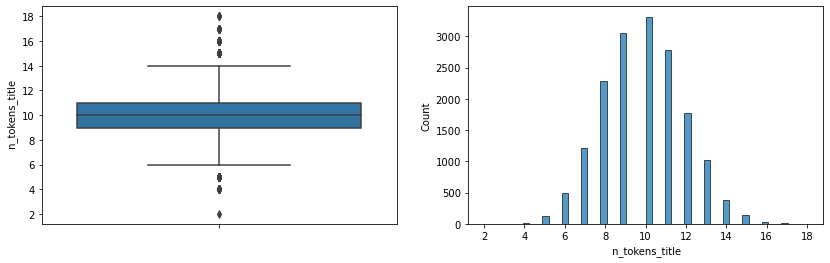

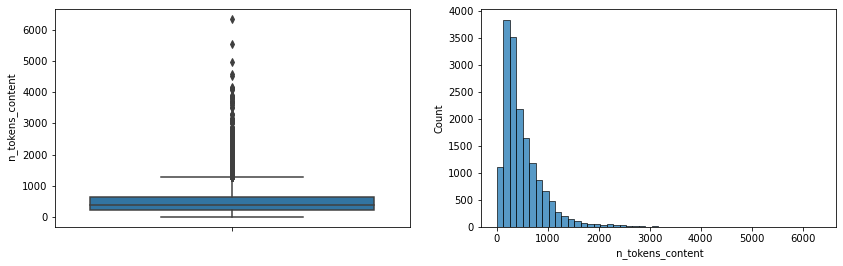

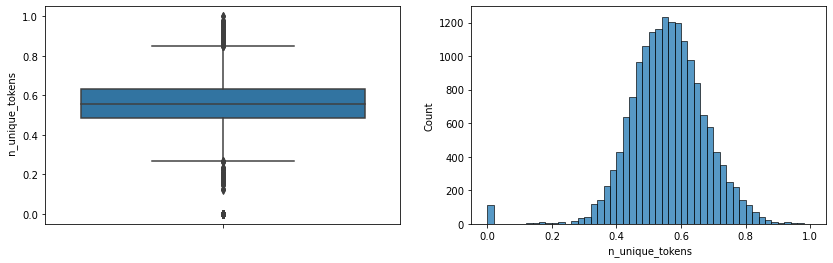

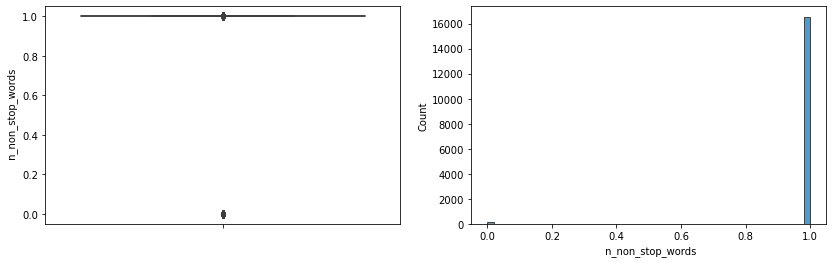

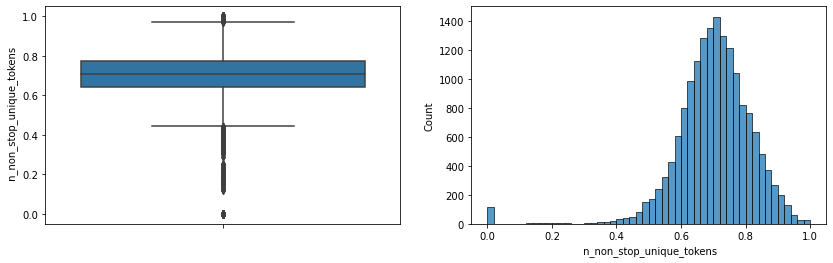

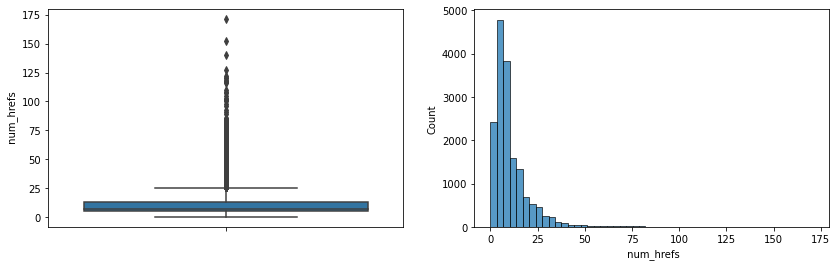

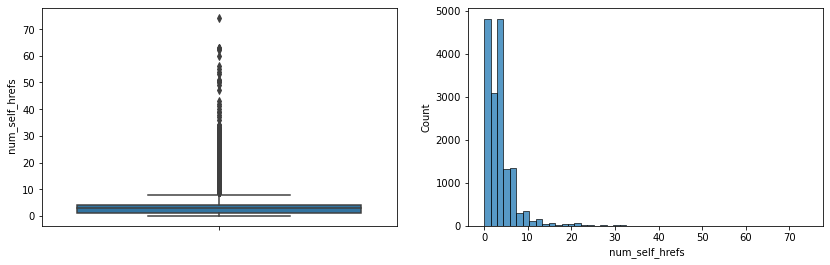

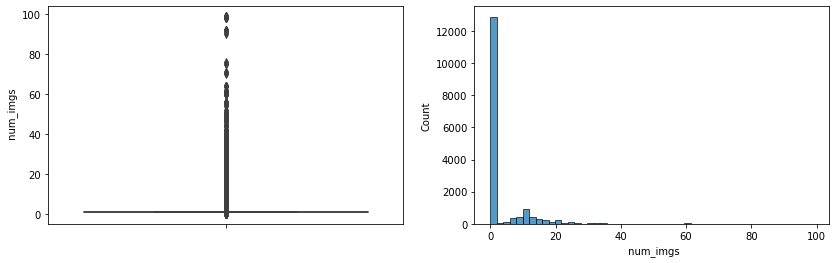

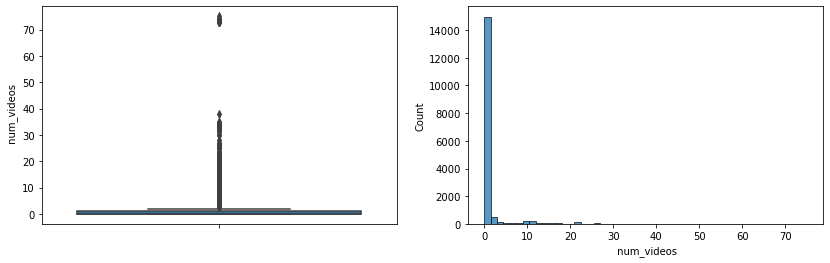

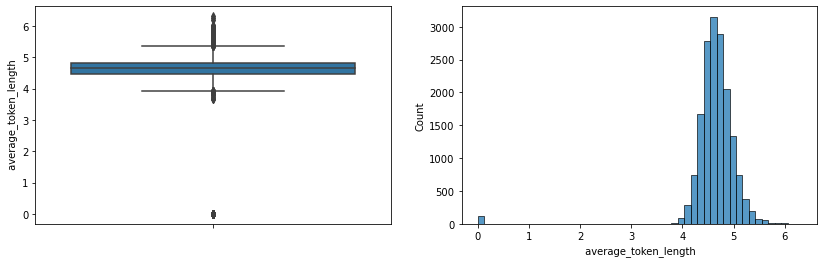

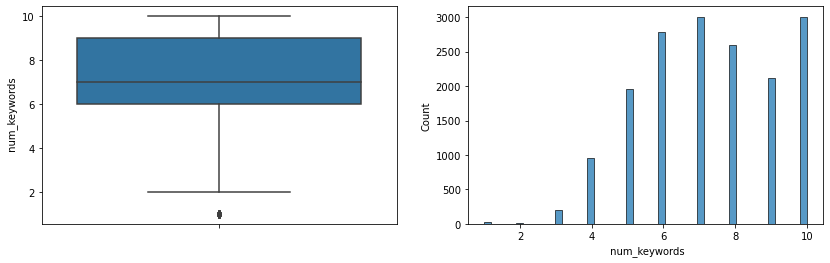

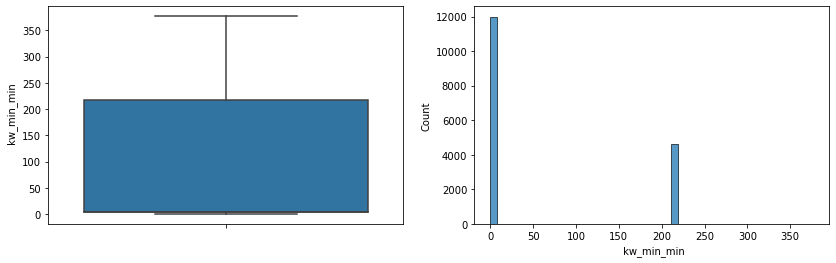

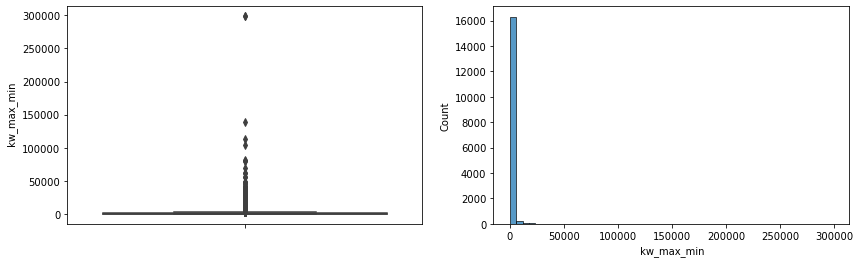

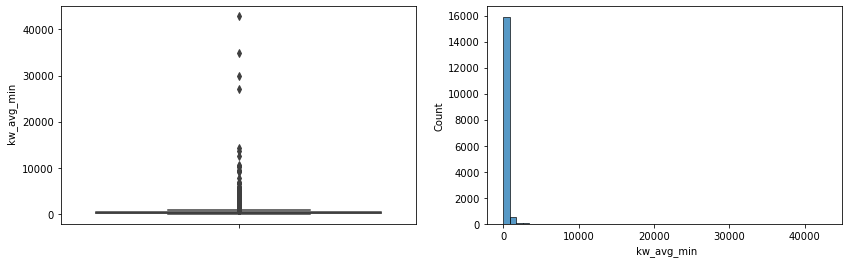

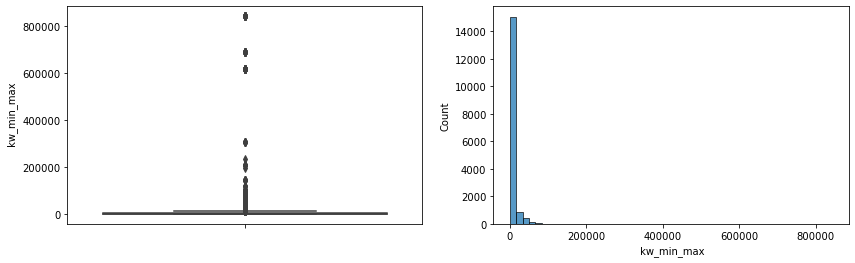

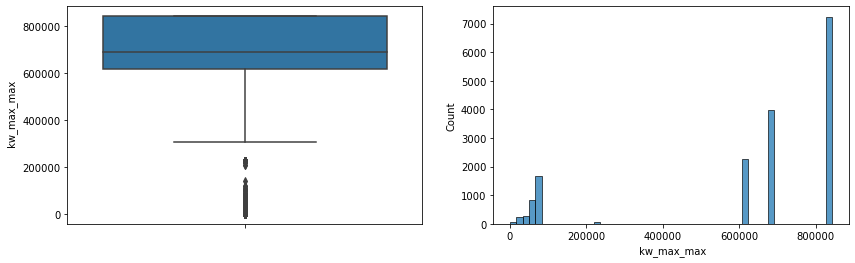

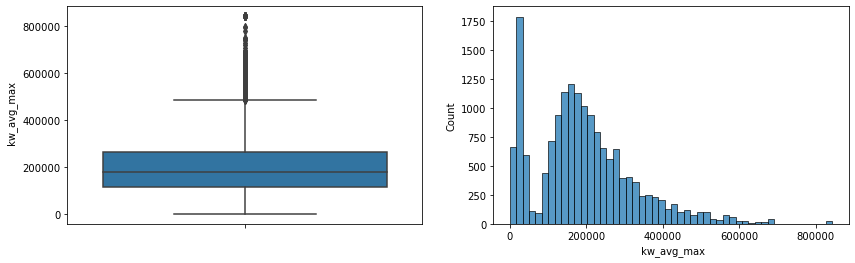

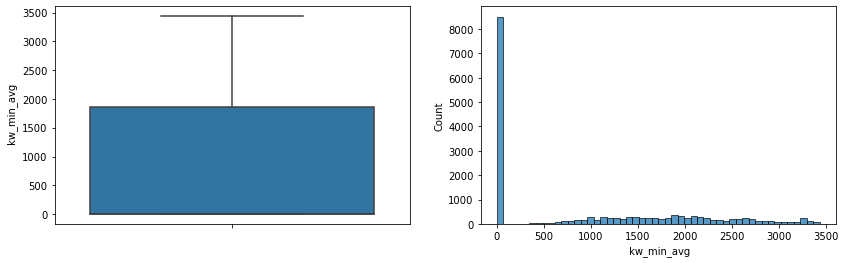

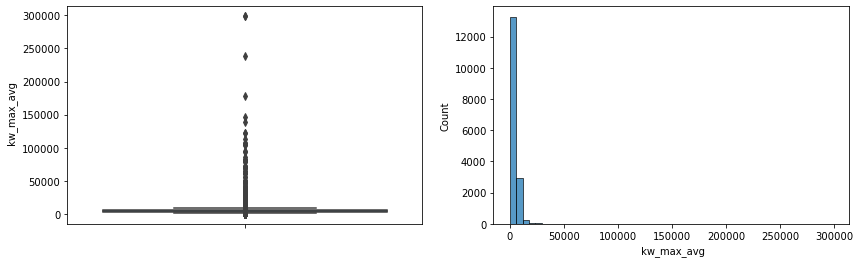

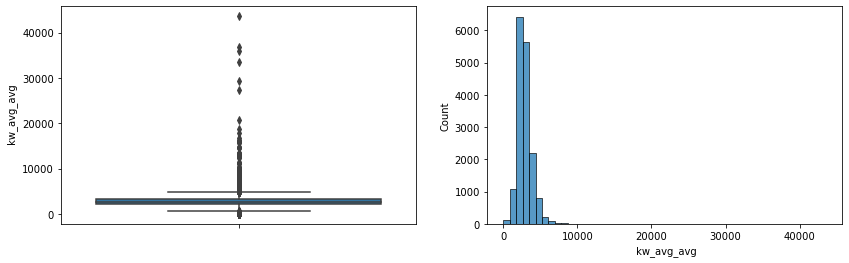

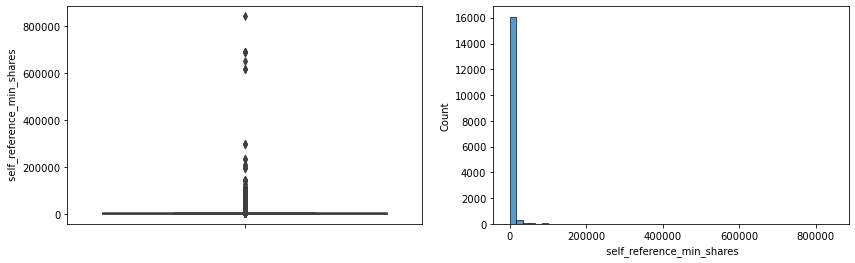

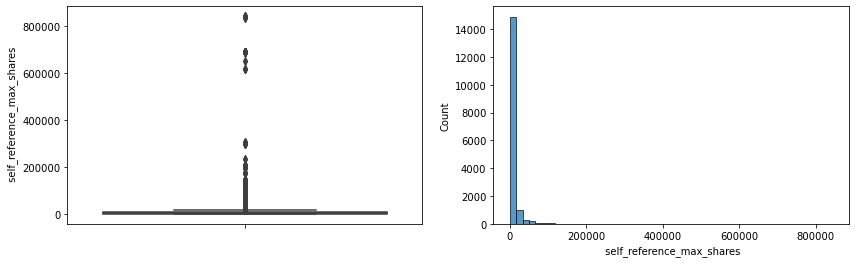

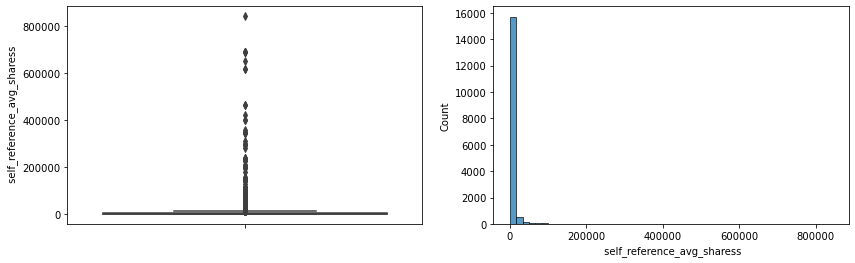

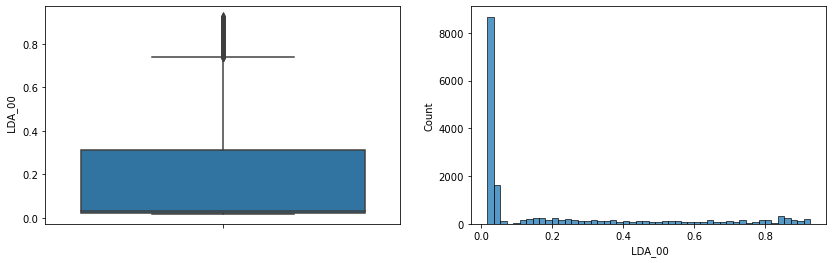

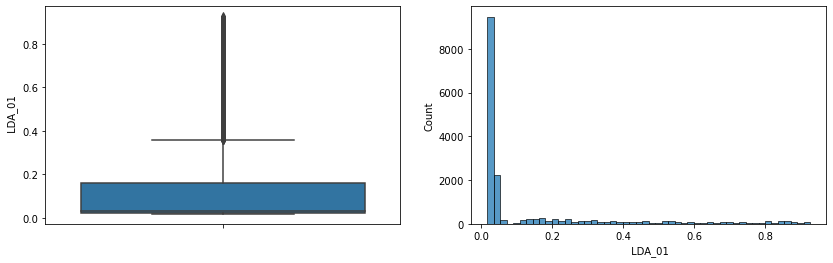

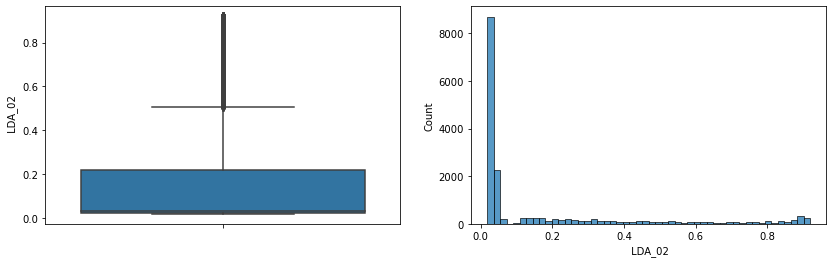

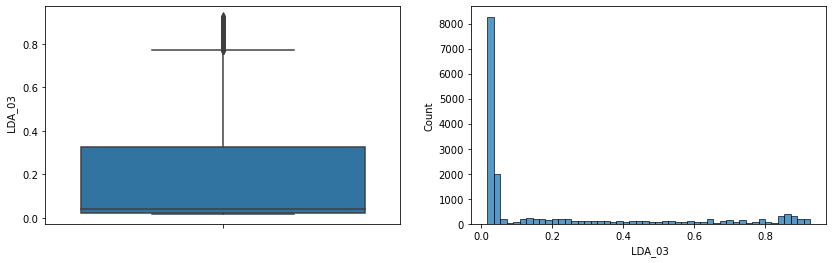

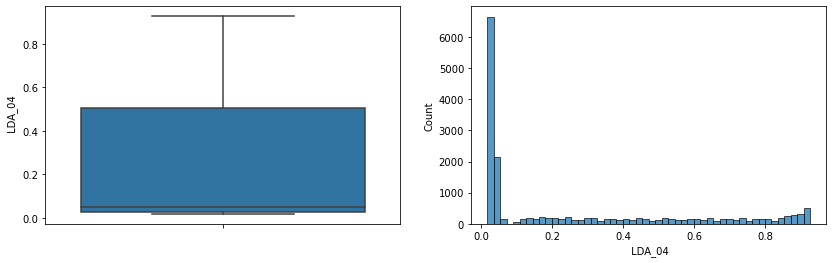

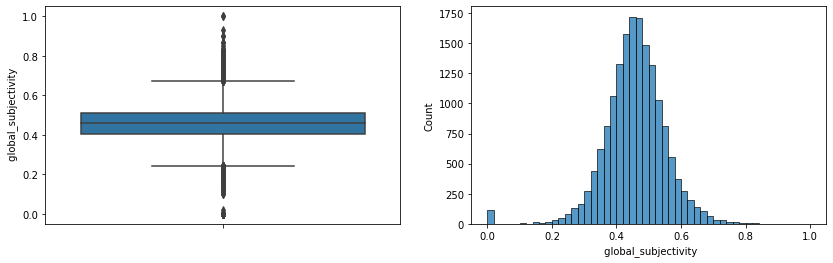

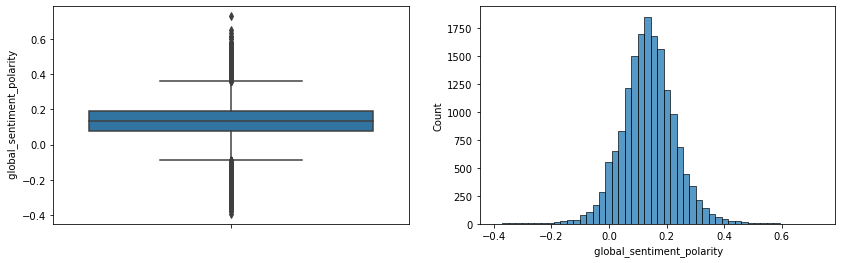

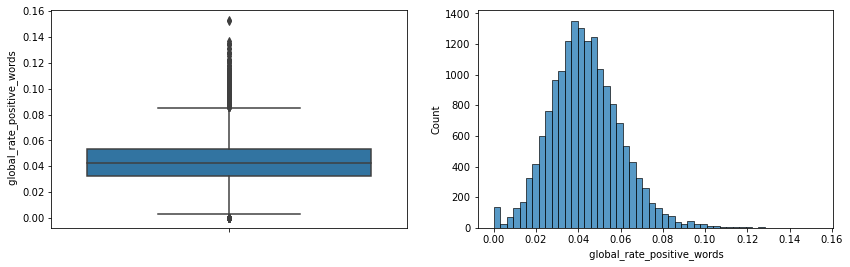

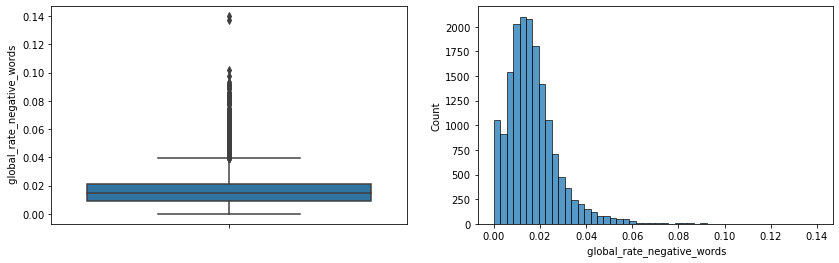

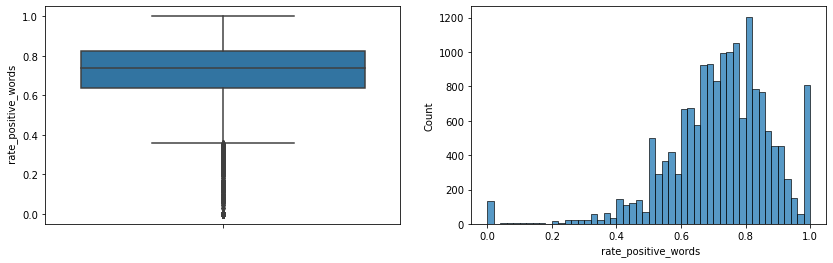

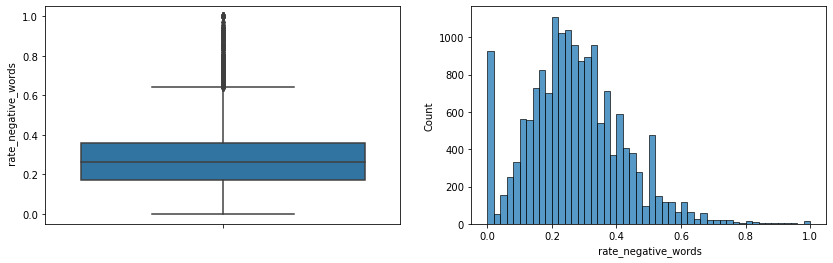

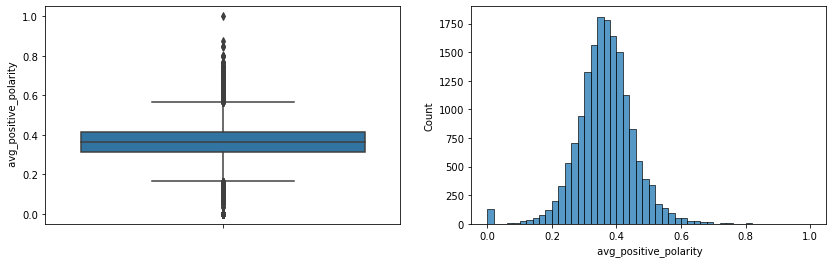

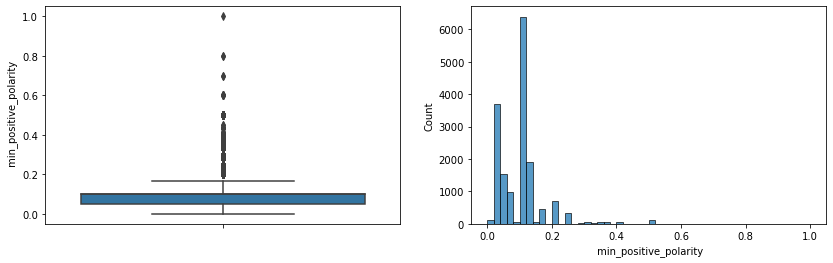

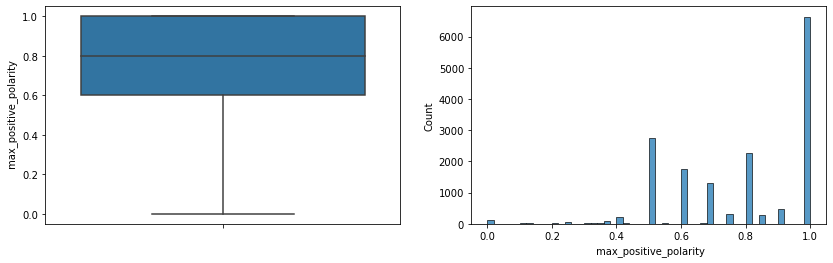

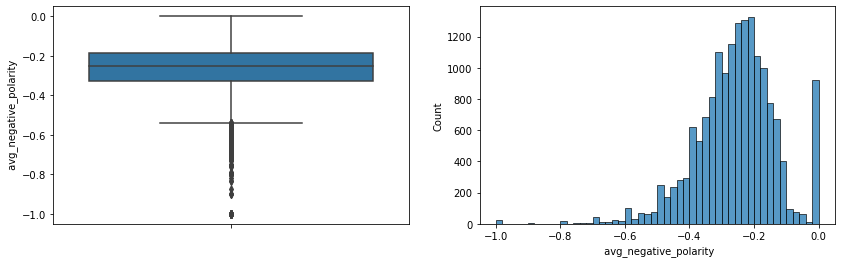

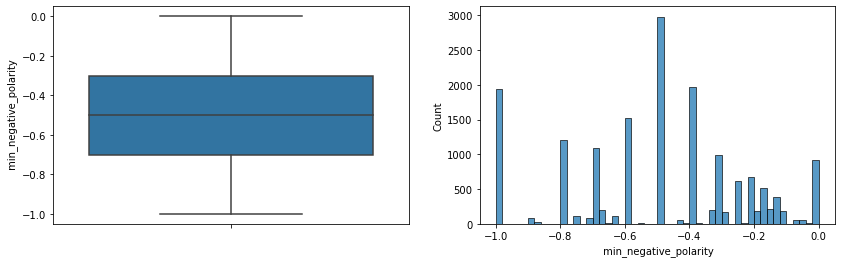

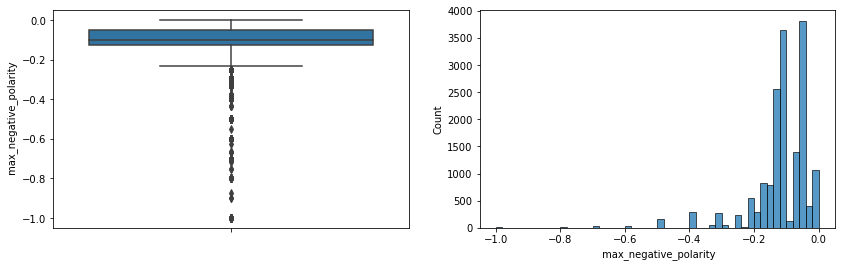

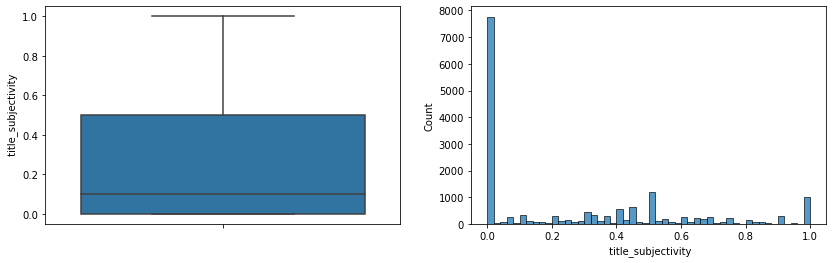

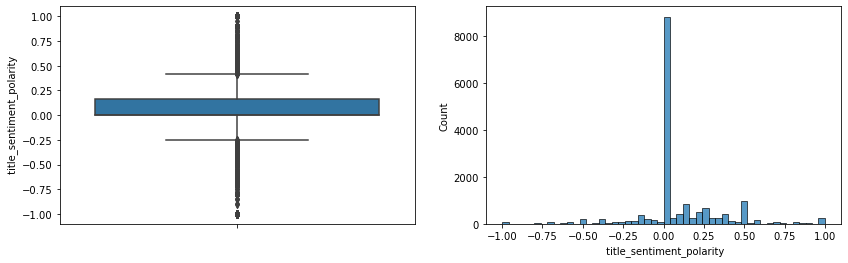

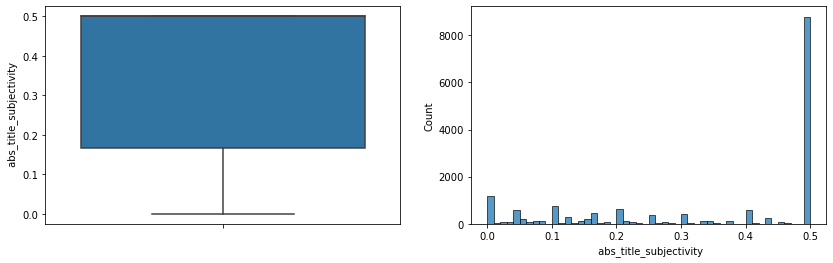

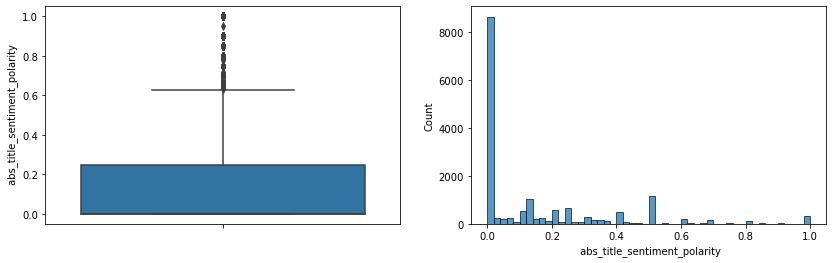

In [16]:
# Use the charts to analyze the distribution for numerical variables
for col in df_num.columns:
    fig, axes = plt.subplots(1, 2,figsize=(14,4))
    sns.histplot(data=df_num, ax=axes[1], x = col, bins=50)
    sns.boxplot(ax=axes[0], y = col, data = df_num,orient='v')

Based on the box plots, most of the numeric variables have many outliers, and according to histograms, only n_tokens_title, n_unique_tokens, global_subjectivity, and global_sentiment_polarity are following nearly normal distribution, and other numeric variables distribution either left-skewed or right-skewed. Although there are many outliers, not all the outliers need to be removed, many of them are meaningful in this study. In the real world, it is common that many outliers are meaningful in the dataset. 



- Categorical data

In [17]:
# Spilt categorical data from dataframe
df_e = df[df.columns[11:17]]
df_f = df[df.columns[29:37]]
df_cat = pd.concat([df_e,df_f],axis = 1)
df_cat.head(1)

data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   

    data_channel_is_world   weekday_is_monday   weekday_is_tuesday  \
0                     0.0                 1.0                  0.0   

    weekday_is_wednesday   weekday_is_thursday   weekday_is_friday  \
0                    0.0                   0.0                 0.0   

    weekday_is_saturday   weekday_is_sunday   is_weekend  
0                   0.0                 0.0          0.0

Visualize the columns relevant to data channels variables(dummy variables)

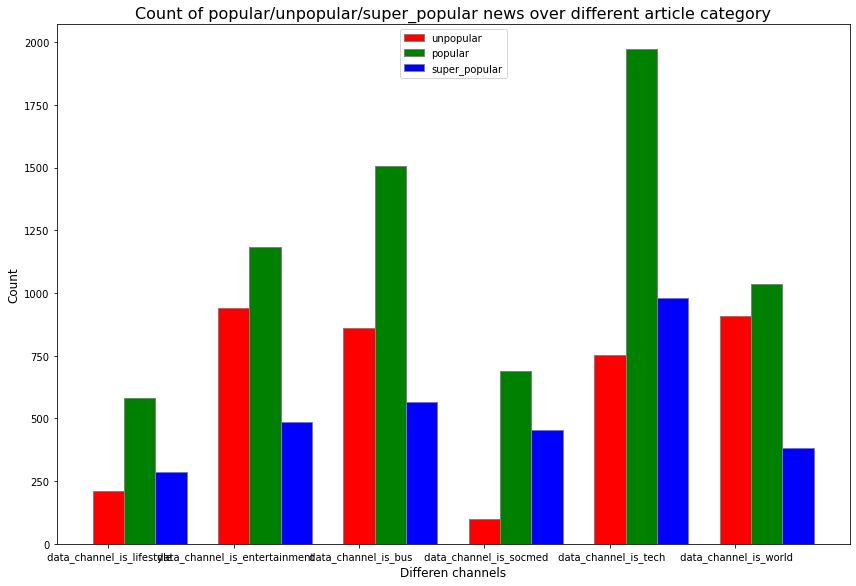

In [18]:
# Define barplot width and plot size
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
channels = df.columns.values[11:17]
unpopular = df[df[' shares']<=946]
popular = df[(df[' shares']<=2800) & (df[' shares'] > 946)]
super_popular = df[(df[' shares']>2800) & (df[' shares'] <= 843300)]
unpopular_chan = unpopular[channels].sum().values
popular_chan = popular[channels].sum().values
super_popular_chan = super_popular[channels].sum().values
# Set position of bar on X axis
br1 = np.arange(len(channels))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, unpopular_chan, color ='r', width = barWidth,
        edgecolor ='grey', label ='unpopular')
plt.bar(br2, popular_chan, color ='g', width = barWidth,
        edgecolor ='grey', label ='popular')
plt.bar(br3, super_popular_chan, color ='b', width = barWidth,
        edgecolor ='grey', label ='super_popular')
# Adding Xticks
plt.xticks(np.arange(len(channels)), channels)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Differen channels", fontsize = 12)
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.title("Count of popular/unpopular/super_popular news over different article category", fontsize = 16)
plt.show()

Visualize the columns relevant to days of week variables(dummy variables)

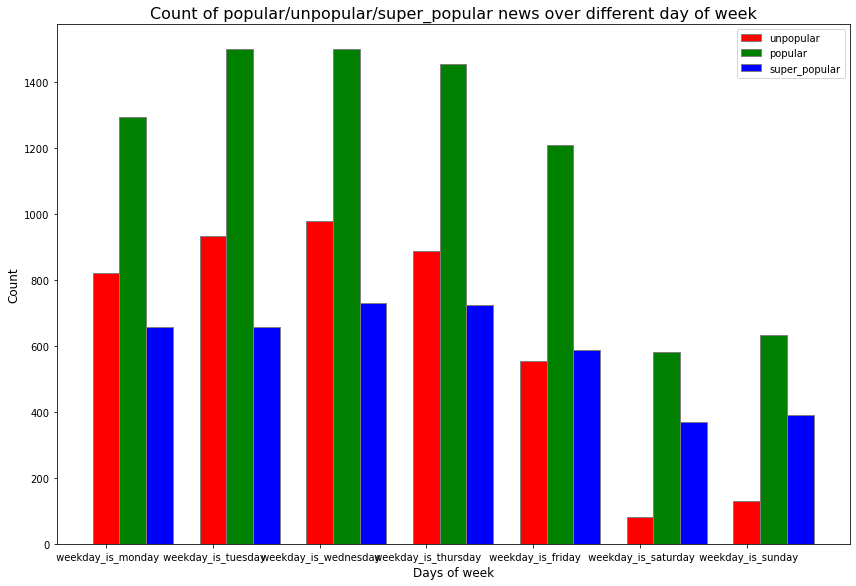

In [19]:
# Define barplot width and plot size
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
channels = df.columns.values[29:36]
unpopular = df[df[' shares']<=946]
popular = df[(df[' shares']<=2800) & (df[' shares'] > 946)]
super_popular = df[(df[' shares']>2800) & (df[' shares'] <= 843300)]
unpopular_chan = unpopular[channels].sum().values
popular_chan = popular[channels].sum().values
super_popular_chan = super_popular[channels].sum().values
# Set position of bar on X axis
br1 = np.arange(len(channels))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, unpopular_chan, color ='r', width = barWidth,
        edgecolor ='grey', label ='unpopular')
plt.bar(br2, popular_chan, color ='g', width = barWidth,
        edgecolor ='grey', label ='popular')
plt.bar(br3, super_popular_chan, color ='b', width = barWidth,
        edgecolor ='grey', label ='super_popular')
# Adding Xticks
plt.xticks(np.arange(len(channels)), channels)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.title("Count of popular/unpopular/super_popular news over different day of week", fontsize = 16)
plt.show()

## 3.Dimensionality Reduction (PCA)

In [20]:
# Load PCA package
'''**********************************
Original code cited from https://www.youtube.com/watch?v=oiusrJ0btwA&t=539s&ab_channel=DataProfessor  (The link also can be found on reference)

*************************************'''
from sklearn import decomposition
from sklearn.preprocessing import scale

In [21]:
# Data scaling
X =scale(df_num)

In [22]:
# We define the number of PC to use as 20 because the n_components lower than 20 can not satisfy the following modeling needs. 
# For a detailed explanation, please see the next plot.
pca = decomposition.PCA(n_components=20)
pca.fit(X)


PCA(n_components=20)

In [23]:
scores = pca.transform(X)
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7','PC8','PC9', 'PC10', 'PC11','PC12','PC13', 'PC14', 'PC15','PC16','PC17', 'PC18', 'PC19','PC20'])
scores_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.467009 -0.065849 -1.804710 -2.090509  0.369453 -1.519770  1.094713   
1     -3.232792 -1.390389 -1.602335 -0.764460  0.217541  0.905372  0.603909   
2     -2.175747  1.473250  0.333554 -2.830377  0.964271  0.644937  0.791229   
3     -0.973492 -2.007736 -0.660627 -2.311776  1.019138  0.490995  0.761828   
4     -2.226913  0.653669  4.669872 -2.423141  0.483855 -0.484432  1.283418   
...         ...       ...       ...       ...       ...       ...       ...   
16659  0.644913 -2.142158  0.619204 -1.032490  2.081194 -1.401686  0.738627   
16660  2.199151  0.229758  0.171243 -0.140624  1.549927  0.461560 -0.262316   
16661  2.450808  2.360484  0.558309  3.869201  4.301472 -1.299288 -1.696647   
16662  3.764022  1.395721  0.113401 -1.729611  2.351290  1.071983 -0.029876   
16663  9.718005  0.798969 -0.188778  4.734259  4.858022  0.037592 -0.506585   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     -0.197550  1.746693  1.067490  0.344816  0.010539  1.093655 -1.039757   
1     -0.726702  2.128536 -1.411346  0.133938 -0.112985  0.144747 -1.101021   
2     -1.900478 -0.343452  1.523717  1.048039  1.140336 -1.877933 -0.681043   
3     -0.686896  0.108862  0.784190  0.239494 -0.866227 -0.040622 -0.942211   
4      0.304537 -0.563280  0.168914 -0.281064  1.389000  1.837779  1.216112   
...         ...       ...       ...       ...       ...       ...       ...   
16659  0.824937  0.855442  0.192887  0.703161 -0.212063  2.218089  0.262019   
16660 -1.572909 -1.692019  3.500678 -1.386889 -0.319102  0.422492 -1.355143   
16661 -0.605781  0.348647 -0.024510  0.299949 -1.341182  1.006076  1.918778   
16662 -1.779047 -2.953844  1.638138 -2.769108 -1.436521 -0.088909 -2.359951   
16663  0.767904 -2.190200 -0.030065 -3.022418 -0.327491  0.755733 -0.551002   

           PC15      PC16      PC17      PC18      PC19      PC20  
0     -0.156472  1.251839  0.073056 -0.712478  0.505219  1.401255  
1     -1.039658 -0.064303 -0.474005  0.294341 -0.256391  0.350383  
2      0.946690  0.365276 -0.285290 -0.492092 -0.180323  0.371102  
3      1.945310 -0.069254  0.509349  0.317808 -0.011264  0.134860  
4     -0.901196  1.826277  0.621178 -1.248257 -0.068870  0.877049  
...         ...       ...       ...       ...       ...       ...  
16659 -0.107628  0.511079 -0.470459  0.693391  0.999820 -0.136493  
16660  0.180757 -0.142523 -0.775727  0.819227  0.833979 -0.625450  
16661 -0.541284 -1.096358  0.670163  0.376525  0.230340 -0.513226  
16662 -0.457447 -0.646184 -0.472539  0.574270  1.189282 -0.485765  
16663 -1.354753  1.864098 -0.765997 -0.782563  0.728373 -0.209448  

[16664 rows x 20 columns]

In [24]:
# Return the proportion of explained_variance of the PCA model 
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.09793497, 0.09366202, 0.08316804, 0.07309559, 0.05883941,
       0.0570637 , 0.051108  , 0.0398469 , 0.03798167, 0.03511429,
       0.03063944, 0.02901706, 0.02750509, 0.02627953, 0.02412799,
       0.02230447, 0.01961158, 0.01805246, 0.01666945, 0.01542192])

In [25]:
explained_variance = np.insert(explained_variance, 0, 0)

In [26]:
# Return the proportion of cumulative_variance of the PCA model
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [27]:
# Combining the dataframe
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7','PC8','PC9', 'PC10', 'PC11','PC12','PC13', 'PC14', 'PC15','PC16','PC17', 'PC18', 'PC19','PC20'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [28]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

PC  Explained Variance  Cumulative Variance
0                   0.000000                0.000
1    PC1            0.097935                0.098
2    PC2            0.093662                0.192
3    PC3            0.083168                0.275
4    PC4            0.073096                0.348
5    PC5            0.058839                0.407
6    PC6            0.057064                0.464
7    PC7            0.051108                0.515
8    PC8            0.039847                0.555
9    PC9            0.037982                0.593
10  PC10            0.035114                0.628
11  PC11            0.030639                0.659
12  PC12            0.029017                0.688
13  PC13            0.027505                0.716
14  PC14            0.026280                0.742
15  PC15            0.024128                0.766
16  PC16            0.022304                0.788
17  PC17            0.019612                0.808
18  PC18            0.018052                0.826
19  PC19            0.016669                0.843
20  PC20            0.015422                0.858

In [29]:
# Make plot

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

The blue bars show the percentage variance explained by each principal component (this comes from pca.explained_variance_ratio_).  The green line shows the cumulative sum (this comes from pca.explained_variance_ratio_.cumsum()).

From the screen plot, we can read off the percentage of the variance in the data explained as we add principal components. So the first principal component explains 9.8% of the variance of the data set. The first 2 principal components explain 19.2%, the first 3 explain 27.5%, and so on. The percentage of the cumulative variance from PC1 to PC19 is below 0.85, therefore we will choose PC20, in which the cumulative variance is above 0.85. 


So when we move on to perform further analysis of the data, we would keep the first twenty principal components, explaining 85.8% of the variance. 

In [30]:
# Pre-review the dataframe after dimensionality reduction 
df_pca=scores_df
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.467009 -0.065849 -1.804710 -2.090509  0.369453 -1.519770  1.094713   
1     -3.232792 -1.390389 -1.602335 -0.764460  0.217541  0.905372  0.603909   
2     -2.175747  1.473250  0.333554 -2.830377  0.964271  0.644937  0.791229   
3     -0.973492 -2.007736 -0.660627 -2.311776  1.019138  0.490995  0.761828   
4     -2.226913  0.653669  4.669872 -2.423141  0.483855 -0.484432  1.283418   
...         ...       ...       ...       ...       ...       ...       ...   
16659  0.644913 -2.142158  0.619204 -1.032490  2.081194 -1.401686  0.738627   
16660  2.199151  0.229758  0.171243 -0.140624  1.549927  0.461560 -0.262316   
16661  2.450808  2.360484  0.558309  3.869201  4.301472 -1.299288 -1.696647   
16662  3.764022  1.395721  0.113401 -1.729611  2.351290  1.071983 -0.029876   
16663  9.718005  0.798969 -0.188778  4.734259  4.858022  0.037592 -0.506585   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     -0.197550  1.746693  1.067490  0.344816  0.010539  1.093655 -1.039757   
1     -0.726702  2.128536 -1.411346  0.133938 -0.112985  0.144747 -1.101021   
2     -1.900478 -0.343452  1.523717  1.048039  1.140336 -1.877933 -0.681043   
3     -0.686896  0.108862  0.784190  0.239494 -0.866227 -0.040622 -0.942211   
4      0.304537 -0.563280  0.168914 -0.281064  1.389000  1.837779  1.216112   
...         ...       ...       ...       ...       ...       ...       ...   
16659  0.824937  0.855442  0.192887  0.703161 -0.212063  2.218089  0.262019   
16660 -1.572909 -1.692019  3.500678 -1.386889 -0.319102  0.422492 -1.355143   
16661 -0.605781  0.348647 -0.024510  0.299949 -1.341182  1.006076  1.918778   
16662 -1.779047 -2.953844  1.638138 -2.769108 -1.436521 -0.088909 -2.359951   
16663  0.767904 -2.190200 -0.030065 -3.022418 -0.327491  0.755733 -0.551002   

           PC15      PC16      PC17      PC18      PC19      PC20  
0     -0.156472  1.251839  0.073056 -0.712478  0.505219  1.401255  
1     -1.039658 -0.064303 -0.474005  0.294341 -0.256391  0.350383  
2      0.946690  0.365276 -0.285290 -0.492092 -0.180323  0.371102  
3      1.945310 -0.069254  0.509349  0.317808 -0.011264  0.134860  
4     -0.901196  1.826277  0.621178 -1.248257 -0.068870  0.877049  
...         ...       ...       ...       ...       ...       ...  
16659 -0.107628  0.511079 -0.470459  0.693391  0.999820 -0.136493  
16660  0.180757 -0.142523 -0.775727  0.819227  0.833979 -0.625450  
16661 -0.541284 -1.096358  0.670163  0.376525  0.230340 -0.513226  
16662 -0.457447 -0.646184 -0.472539  0.574270  1.189282 -0.485765  
16663 -1.354753  1.864098 -0.765997 -0.782563  0.728373 -0.209448  

[16664 rows x 20 columns]

## 4. Regression Model Evaluation

Prepare data for the Regression Model

In [31]:
# Responsable variable
y = pd.DataFrame(df_res['bin_shares'])
y

shares
0           1
1           1
2           2
3           2
4           1
...       ...
23088       1
23257       2
23325       2
23691       3
24284       2

[16664 rows x 1 columns]

In [32]:
df_cat

data_channel_is_lifestyle   data_channel_is_entertainment  \
0                             0.0                             1.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             1.0   
4                             0.0                             0.0   
...                           ...                             ...   
23088                         0.0                             0.0   
23257                         1.0                             0.0   
23325                         0.0                             0.0   
23691                         0.0                             0.0   
24284                         0.0                             0.0   

        data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                       0.0                      0.0                    0.0   
1                       1.0                      0.0                    0.0   
2                       1.0                      0.0                    0.0   
3                       0.0                      0.0                    0.0   
4                       0.0                      0.0                    1.0   
...                     ...                      ...                    ...   
23088                   0.0                      1.0                    0.0   
23257                   0.0                      0.0                    0.0   
23325                   0.0                      0.0                    0.0   
23691                   0.0                      0.0                    0.0   
24284                   0.0                      0.0                    0.0   

        data_channel_is_world   weekday_is_monday   weekday_is_tuesday  \
0                         0.0                 1.0                  0.0   
1                         0.0                 1.0                  0.0   
2                         0.0                 1.0                  0.0   
3                         0.0                 1.0                  0.0   
4                         0.0                 1.0                  0.0   
...                       ...                 ...                  ...   
23088                     0.0                 1.0                  0.0   
23257                     0.0                 0.0                  0.0   
23325                     0.0                 0.0                  0.0   
23691                     0.0                 0.0                  0.0   
24284                     0.0                 1.0                  0.0   

        weekday_is_wednesday   weekday_is_thursday   weekday_is_friday  \
0                        0.0                   0.0                 0.0   
1                        0.0                   0.0                 0.0   
2                        0.0                   0.0                 0.0   
3                        0.0                   0.0                 0.0   
4                        0.0                   0.0                 0.0   
...                      ...                   ...                 ...   
23088                    0.0                   0.0                 0.0   
23257                    1.0                   0.0                 0.0   
23325                    0.0                   1.0                 0.0   
23691                    0.0                   1.0                 0.0   
24284                    0.0                   0.0                 0.0   

        weekday_is_saturday   weekday_is_sunday   is_weekend  
0                       0.0                 0.0          0.0  
1                       0.0                 0.0          0.0  
2                       0.0                 0.0          0.0  
3                       0.0                 0.0          0.0  
4                       0.0                 0.0          0.0  
...                     ...                 ...          ...  
23088      

In [33]:
df_cat01 = df_cat.reset_index()
df_cat01

index   data_channel_is_lifestyle   data_channel_is_entertainment  \
0          0                         0.0                             1.0   
1          1                         0.0                             0.0   
2          2                         0.0                             0.0   
3          3                         0.0                             1.0   
4          4                         0.0                             0.0   
...      ...                         ...                             ...   
16659  23088                         0.0                             0.0   
16660  23257                         1.0                             0.0   
16661  23325                         0.0                             0.0   
16662  23691                         0.0                             0.0   
16663  24284                         0.0                             0.0   

        data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                       0.0                      0.0                    0.0   
1                       1.0                      0.0                    0.0   
2                       1.0                      0.0                    0.0   
3                       0.0                      0.0                    0.0   
4                       0.0                      0.0                    1.0   
...                     ...                      ...                    ...   
16659                   0.0                      1.0                    0.0   
16660                   0.0                      0.0                    0.0   
16661                   0.0                      0.0                    0.0   
16662                   0.0                      0.0                    0.0   
16663                   0.0                      0.0                    0.0   

        data_channel_is_world   weekday_is_monday   weekday_is_tuesday  \
0                         0.0                 1.0                  0.0   
1                         0.0                 1.0                  0.0   
2                         0.0                 1.0                  0.0   
3                         0.0                 1.0                  0.0   
4                         0.0                 1.0                  0.0   
...                       ...                 ...                  ...   
16659                     0.0                 1.0                  0.0   
16660                     0.0                 0.0                  0.0   
16661                     0.0                 0.0                  0.0   
16662                     0.0                 0.0                  0.0   
16663                     0.0                 1.0                  0.0   

        weekday_is_wednesday   weekday_is_thursday   weekday_is_friday  \
0                        0.0                   0.0                 0.0   
1                        0.0                   0.0                 0.0   
2                        0.0                   0.0                 0.0   
3                        0.0                   0.0                 0.0   
4                        0.0                   0.0                 0.0   
...                      ...                   ...                 ...   
16659                    0.0                   0.0                 0.0   
16660                    1.0                   0.0                 0.0   
16661                    0.0                   1.0                 0.0   
16662                    0.0                   1.0                 0.0   
16663                    0.0                   0.0                 0.0   

        weekday_is_saturday   weekday_is_sunday   is_weekend  
0                       0.0                 0.0          0.0  
1                       0.0                 0.0          0.0  
2                       0.0                 0.0          0.0  
3                       0.0                 0.0          0.0  
4                       0.0                 0.0     

In [34]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.467009 -0.065849 -1.804710 -2.090509  0.369453 -1.519770  1.094713   
1     -3.232792 -1.390389 -1.602335 -0.764460  0.217541  0.905372  0.603909   
2     -2.175747  1.473250  0.333554 -2.830377  0.964271  0.644937  0.791229   
3     -0.973492 -2.007736 -0.660627 -2.311776  1.019138  0.490995  0.761828   
4     -2.226913  0.653669  4.669872 -2.423141  0.483855 -0.484432  1.283418   
...         ...       ...       ...       ...       ...       ...       ...   
16659  0.644913 -2.142158  0.619204 -1.032490  2.081194 -1.401686  0.738627   
16660  2.199151  0.229758  0.171243 -0.140624  1.549927  0.461560 -0.262316   
16661  2.450808  2.360484  0.558309  3.869201  4.301472 -1.299288 -1.696647   
16662  3.764022  1.395721  0.113401 -1.729611  2.351290  1.071983 -0.029876   
16663  9.718005  0.798969 -0.188778  4.734259  4.858022  0.037592 -0.506585   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     -0.197550  1.746693  1.067490  0.344816  0.010539  1.093655 -1.039757   
1     -0.726702  2.128536 -1.411346  0.133938 -0.112985  0.144747 -1.101021   
2     -1.900478 -0.343452  1.523717  1.048039  1.140336 -1.877933 -0.681043   
3     -0.686896  0.108862  0.784190  0.239494 -0.866227 -0.040622 -0.942211   
4      0.304537 -0.563280  0.168914 -0.281064  1.389000  1.837779  1.216112   
...         ...       ...       ...       ...       ...       ...       ...   
16659  0.824937  0.855442  0.192887  0.703161 -0.212063  2.218089  0.262019   
16660 -1.572909 -1.692019  3.500678 -1.386889 -0.319102  0.422492 -1.355143   
16661 -0.605781  0.348647 -0.024510  0.299949 -1.341182  1.006076  1.918778   
16662 -1.779047 -2.953844  1.638138 -2.769108 -1.436521 -0.088909 -2.359951   
16663  0.767904 -2.190200 -0.030065 -3.022418 -0.327491  0.755733 -0.551002   

           PC15      PC16      PC17      PC18      PC19      PC20  
0     -0.156472  1.251839  0.073056 -0.712478  0.505219  1.401255  
1     -1.039658 -0.064303 -0.474005  0.294341 -0.256391  0.350383  
2      0.946690  0.365276 -0.285290 -0.492092 -0.180323  0.371102  
3      1.945310 -0.069254  0.509349  0.317808 -0.011264  0.134860  
4     -0.901196  1.826277  0.621178 -1.248257 -0.068870  0.877049  
...         ...       ...       ...       ...       ...       ...  
16659 -0.107628  0.511079 -0.470459  0.693391  0.999820 -0.136493  
16660  0.180757 -0.142523 -0.775727  0.819227  0.833979 -0.625450  
16661 -0.541284 -1.096358  0.670163  0.376525  0.230340 -0.513226  
16662 -0.457447 -0.646184 -0.472539  0.574270  1.189282 -0.485765  
16663 -1.354753  1.864098 -0.765997 -0.782563  0.728373 -0.209448  

[16664 rows x 20 columns]

In [35]:
# Combine df_pca and df_cat01
x = pd.concat([df_pca,df_cat01],axis = 1)
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.467009 -0.065849 -1.804710 -2.090509  0.369453 -1.519770  1.094713   
1     -3.232792 -1.390389 -1.602335 -0.764460  0.217541  0.905372  0.603909   
2     -2.175747  1.473250  0.333554 -2.830377  0.964271  0.644937  0.791229   
3     -0.973492 -2.007736 -0.660627 -2.311776  1.019138  0.490995  0.761828   
4     -2.226913  0.653669  4.669872 -2.423141  0.483855 -0.484432  1.283418   
...         ...       ...       ...       ...       ...       ...       ...   
16659  0.644913 -2.142158  0.619204 -1.032490  2.081194 -1.401686  0.738627   
16660  2.199151  0.229758  0.171243 -0.140624  1.549927  0.461560 -0.262316   
16661  2.450808  2.360484  0.558309  3.869201  4.301472 -1.299288 -1.696647   
16662  3.764022  1.395721  0.113401 -1.729611  2.351290  1.071983 -0.029876   
16663  9.718005  0.798969 -0.188778  4.734259  4.858022  0.037592 -0.506585   

            PC8       PC9      PC10  ...   data_channel_is_tech  \
0     -0.197550  1.746693  1.067490  ...                    0.0   
1     -0.726702  2.128536 -1.411346  ...                    0.0   
2     -1.900478 -0.343452  1.523717  ...                    0.0   
3     -0.686896  0.108862  0.784190  ...                    0.0   
4      0.304537 -0.563280  0.168914  ...                    1.0   
...         ...       ...       ...  ...                    ...   
16659  0.824937  0.855442  0.192887  ...                    0.0   
16660 -1.572909 -1.692019  3.500678  ...                    0.0   
16661 -0.605781  0.348647 -0.024510  ...                    0.0   
16662 -1.779047 -2.953844  1.638138  ...                    0.0   
16663  0.767904 -2.190200 -0.030065  ...                    0.0   

        data_channel_is_world   weekday_is_monday   weekday_is_tuesday  \
0                         0.0                 1.0                  0.0   
1                         0.0                 1.0                  0.0   
2                         0.0                 1.0                  0.0   
3                         0.0                 1.0                  0.0   
4                         0.0                 1.0                  0.0   
...                       ...                 ...                  ...   
16659                     0.0                 1.0                  0.0   
16660                     0.0                 0.0                  0.0   
16661                     0.0                 0.0                  0.0   
16662                     0.0                 0.0                  0.0   
16663                     0.0                 1.0                  0.0   

        weekday_is_wednesday   weekday_is_thursday   weekday_is_friday  \
0                        0.0                   0.0                 0.0   
1                        0.0                   0.0                 0.0   
2                        0.0                   0.0                 0.0   
3                        0.0                   0.0                 0.0   
4                        0.0                   0.0                 0.0   
...                      ...                   ...                 ...   
16659                    0.0                   0.0                 0.0   
16660                    1.0                   0.0                 0.0   
16661                    0.0                   1.0                 0.0   
16662                    0.0                   1.0                 0.0   
16663                    0.0                   0.0                 0.0   

        weekday_is_saturday   weekday_is_sunday   is_weekend  
0                       0.0                 0.0          0.0  
1                       0.0                 0.0          0.0  
2                       0.0                 0.0          0.0  
3                       0.0                 0.0          0.0  
4                       0.0                 0.0          0.0  
...                     ...                 ...          ...  
16659                   0.0            

In [36]:
# Load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Now split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [37]:
# Let's check the row indices of the new objects to see whether they match
y_test.head()

shares
7869        2
8001        2
1827        2
16352       2
14661       1

In [38]:
# Check the results
x_test.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
7869   1.860889 -1.780528 -2.213586  0.355819 -0.273702 -1.039111  1.868082   
8001  -0.948634  1.384447 -0.878645 -0.517651  0.301161  1.464354 -0.477881   
1827  -4.882728 -0.006555 -0.772672  1.189033  1.149280  0.767254  0.479639   
16352  0.546495 -1.110256  0.444235 -0.319946  0.087486  0.919422 -0.345243   
14661  1.045800 -1.443737  3.745786 -1.604104 -0.451029  1.064844 -0.769390   

            PC8       PC9      PC10  ...   data_channel_is_tech  \
7869   0.903413  0.930745  2.223982  ...                    0.0   
8001  -0.282891 -1.139992  0.838516  ...                    1.0   
1827  -1.206038  0.571927 -1.486306  ...                    1.0   
16352 -0.168321 -0.738596  1.498886  ...                    0.0   
14661  2.071743  0.717080 -0.275551  ...                    0.0   

        data_channel_is_world   weekday_is_monday   weekday_is_tuesday  \
7869                      0.0                 0.0                  1.0   
8001                      0.0                 0.0                  0.0   
1827                      0.0                 0.0                  0.0   
16352                     0.0                 0.0                  1.0   
14661                     1.0                 0.0                  0.0   

        weekday_is_wednesday   weekday_is_thursday   weekday_is_friday  \
7869                     0.0                   0.0                 0.0   
8001                     0.0                   1.0                 0.0   
1827                     0.0                   1.0                 0.0   
16352                    0.0                   0.0                 0.0   
14661                    1.0                   0.0                 0.0   

        weekday_is_saturday   weekday_is_sunday   is_weekend  
7869                    0.0                 0.0          0.0  
8001                    0.0                 0.0          0.0  
1827                    0.0                 0.0          0.0  
16352                   0.0                 0.0          0.0  
14661                   0.0                 0.0          0.0  

[5 rows x 35 columns]

In [39]:
# Check the results
y_train.head()

shares
14449       2
9697        3
16095       3
1316        2
2264        3

In [40]:
# Check the results
x_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
14449  0.300178 -2.238706 -0.105662  1.128698 -0.486362  2.214836  0.011858   
9697   1.276004  0.860634  1.026739 -0.159428 -0.701337 -2.072757  0.044471   
16095 -0.998399  1.242181 -0.388864  0.847671 -1.785705 -0.554275 -0.206768   
1316  -2.304327 -0.849715  2.130515 -0.440699  1.747748 -2.318662  1.273563   
2264  -3.082315  1.169647 -1.241569  0.376726  0.914845 -2.854063  1.031666   

            PC8       PC9      PC10  ...   data_channel_is_tech  \
14449  1.023324 -0.607651 -1.237344  ...                    0.0   
9697   0.365973 -0.695309  0.460975  ...                    0.0   
16095  0.333090  2.495822  1.237664  ...                    0.0   
1316   0.502376 -1.060955 -1.326091  ...                    0.0   
2264  -0.490936  2.467168 -0.098189  ...                    0.0   

        data_channel_is_world   weekday_is_monday   weekday_is_tuesday  \
14449                     0.0                 0.0                  0.0   
9697                      0.0                 0.0                  0.0   
16095                     0.0                 0.0                  0.0   
1316                      0.0                 0.0                  1.0   
2264                      0.0                 0.0                  0.0   

        weekday_is_wednesday   weekday_is_thursday   weekday_is_friday  \
14449                    0.0                   0.0                 0.0   
9697                     1.0                   0.0                 0.0   
16095                    0.0                   1.0                 0.0   
1316                     0.0                   0.0                 0.0   
2264                     0.0                   1.0                 0.0   

        weekday_is_saturday   weekday_is_sunday   is_weekend  
14449                   1.0                 0.0          1.0  
9697                    0.0                 0.0          0.0  
16095                   0.0                 0.0          0.0  
1316                    0.0                 0.0          0.0  
2264                    0.0                 0.0          0.0  

[5 rows x 35 columns]

### Linear regression model

In [41]:
# Create a new dataframe containing only explanatory variables for the linear regression model
newx_train_01 = x_train.copy()

# Pre-review the new dataframe
newx_train_01

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
14449  0.300178 -2.238706 -0.105662  1.128698 -0.486362  2.214836  0.011858   
9697   1.276004  0.860634  1.026739 -0.159428 -0.701337 -2.072757  0.044471   
16095 -0.998399  1.242181 -0.388864  0.847671 -1.785705 -0.554275 -0.206768   
1316  -2.304327 -0.849715  2.130515 -0.440699  1.747748 -2.318662  1.273563   
2264  -3.082315  1.169647 -1.241569  0.376726  0.914845 -2.854063  1.031666   
...         ...       ...       ...       ...       ...       ...       ...   
9475  -0.685108  1.281899  1.219308 -0.381884 -0.649380  1.556785 -0.604765   
3714  -3.607825  2.851286 -0.122658  1.131037  0.581341  1.336326 -0.570850   
7409  -0.037872  1.255671  5.295915 -1.551046 -0.141018 -0.771362 -0.074638   
5787   0.620503 -2.326629 -1.303885 -0.504505 -0.351950  1.901013 -0.620029   
14155  3.135223 -0.010279 -1.469064 -0.563225 -1.344830 -0.137030 -0.955373   

            PC8       PC9      PC10  ...   data_channel_is_tech  \
14449  1.023324 -0.607651 -1.237344  ...                    0.0   
9697   0.365973 -0.695309  0.460975  ...                    0.0   
16095  0.333090  2.495822  1.237664  ...                    0.0   
1316   0.502376 -1.060955 -1.326091  ...                    0.0   
2264  -0.490936  2.467168 -0.098189  ...                    0.0   
...         ...       ...       ...  ...                    ...   
9475  -0.691991 -1.140548  1.217105  ...                    1.0   
3714  -0.555881  0.552741 -1.653018  ...                    0.0   
7409   0.114030 -0.650885  0.997082  ...                    1.0   
5787   1.397224  0.399608 -0.705620  ...                    0.0   
14155 -0.386981 -0.456209 -0.548931  ...                    0.0   

        data_channel_is_world   weekday_is_monday   weekday_is_tuesday  \
14449                     0.0                 0.0                  0.0   
9697                      0.0                 0.0                  0.0   
16095                     0.0                 0.0                  0.0   
1316                      0.0                 0.0                  1.0   
2264                      0.0                 0.0                  0.0   
...                       ...                 ...                  ...   
9475                      0.0                 0.0                  0.0   
3714                      0.0                 0.0                  0.0   
7409                      0.0                 0.0                  0.0   
5787                      1.0                 0.0                  1.0   
14155                     0.0                 1.0                  0.0   

        weekday_is_wednesday   weekday_is_thursday   weekday_is_friday  \
14449                    0.0                   0.0                 0.0   
9697                     1.0                   0.0                 0.0   
16095                    0.0                   1.0                 0.0   
1316                     0.0                   0.0                 0.0   
2264                     0.0                   1.0                 0.0   
...                      ...                   ...                 ...   
9475                     0.0                   0.0                 0.0   
3714                     1.0                   0.0                 0.0   
7409                     0.0                   0.0                 1.0   
5787                     0.0                   0.0                 0.0   
14155                    0.0                   0.0                 0.0   

        weekday_is_saturday   weekday_is_sunday   is_weekend  
14449                   1.0                 0.0          1.0  
9697                    0.0                 0.0          0.0  
16095                   0.0                 0.0          0.0  
1316                    0.0                 0.0          0.0  
2264                    0.0                 0.0          0.0  
...                     ...                 ...          ...  
9475                    1.0            

In [42]:
# Data information
newx_train_01.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11664 entries, 14449 to 14155
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PC1                             11664 non-null  float64
 1   PC2                             11664 non-null  float64
 2   PC3                             11664 non-null  float64
 3   PC4                             11664 non-null  float64
 4   PC5                             11664 non-null  float64
 5   PC6                             11664 non-null  float64
 6   PC7                             11664 non-null  float64
 7   PC8                             11664 non-null  float64
 8   PC9                             11664 non-null  float64
 9   PC10                            11664 non-null  float64
 10  PC11                            11664 non-null  float64
 11  PC12                            11664 non-null  float64
 12  PC13                        

In [43]:
# Drop index
newx_train_01 = newx_train_01.drop(newx_train_01.columns[[20]],axis=1)
newx_train_01

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
14449  0.300178 -2.238706 -0.105662  1.128698 -0.486362  2.214836  0.011858   
9697   1.276004  0.860634  1.026739 -0.159428 -0.701337 -2.072757  0.044471   
16095 -0.998399  1.242181 -0.388864  0.847671 -1.785705 -0.554275 -0.206768   
1316  -2.304327 -0.849715  2.130515 -0.440699  1.747748 -2.318662  1.273563   
2264  -3.082315  1.169647 -1.241569  0.376726  0.914845 -2.854063  1.031666   
...         ...       ...       ...       ...       ...       ...       ...   
9475  -0.685108  1.281899  1.219308 -0.381884 -0.649380  1.556785 -0.604765   
3714  -3.607825  2.851286 -0.122658  1.131037  0.581341  1.336326 -0.570850   
7409  -0.037872  1.255671  5.295915 -1.551046 -0.141018 -0.771362 -0.074638   
5787   0.620503 -2.326629 -1.303885 -0.504505 -0.351950  1.901013 -0.620029   
14155  3.135223 -0.010279 -1.469064 -0.563225 -1.344830 -0.137030 -0.955373   

            PC8       PC9      PC10  ...   data_channel_is_tech  \
14449  1.023324 -0.607651 -1.237344  ...                    0.0   
9697   0.365973 -0.695309  0.460975  ...                    0.0   
16095  0.333090  2.495822  1.237664  ...                    0.0   
1316   0.502376 -1.060955 -1.326091  ...                    0.0   
2264  -0.490936  2.467168 -0.098189  ...                    0.0   
...         ...       ...       ...  ...                    ...   
9475  -0.691991 -1.140548  1.217105  ...                    1.0   
3714  -0.555881  0.552741 -1.653018  ...                    0.0   
7409   0.114030 -0.650885  0.997082  ...                    1.0   
5787   1.397224  0.399608 -0.705620  ...                    0.0   
14155 -0.386981 -0.456209 -0.548931  ...                    0.0   

        data_channel_is_world   weekday_is_monday   weekday_is_tuesday  \
14449                     0.0                 0.0                  0.0   
9697                      0.0                 0.0                  0.0   
16095                     0.0                 0.0                  0.0   
1316                      0.0                 0.0                  1.0   
2264                      0.0                 0.0                  0.0   
...                       ...                 ...                  ...   
9475                      0.0                 0.0                  0.0   
3714                      0.0                 0.0                  0.0   
7409                      0.0                 0.0                  0.0   
5787                      1.0                 0.0                  1.0   
14155                     0.0                 1.0                  0.0   

        weekday_is_wednesday   weekday_is_thursday   weekday_is_friday  \
14449                    0.0                   0.0                 0.0   
9697                     1.0                   0.0                 0.0   
16095                    0.0                   1.0                 0.0   
1316                     0.0                   0.0                 0.0   
2264                     0.0                   1.0                 0.0   
...                      ...                   ...                 ...   
9475                     0.0                   0.0                 0.0   
3714                     1.0                   0.0                 0.0   
7409                     0.0                   0.0                 1.0   
5787                     0.0                   0.0                 0.0   
14155                    0.0                   0.0                 0.0   

        weekday_is_saturday   weekday_is_sunday   is_weekend  
14449                   1.0                 0.0          1.0  
9697                    0.0                 0.0          0.0  
16095                   0.0                 0.0          0.0  
1316                    0.0                 0.0          0.0  
2264                    0.0                 0.0          0.0  
...                     ...                 ...          ...  
9475                    1.0            

According to PCA analysis, explanatory variables were reduced to 20 components. We add 14 dummy variables to the explanatory variables, so we have 34 explanatory variables totally for the linear regression model. 

In [44]:
# Load the LinearRegression() function 
from sklearn.linear_model import LinearRegression

# Load the cross_val_score function 
from sklearn.model_selection import cross_val_score

# Using the LinearRegression model function 
model = LinearRegression()

# Use the cross_val_score() function to get the score
# According to the research, the "K" in K-fold cross-validation in the data analysis field is usually chosen 10. So we think K = 10 works for this model. 
scores = cross_val_score(model, newx_train_01, y_train, cv=10)

# Print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)

[0.06838052 0.08587335 0.10204878 0.09349406 0.1121477  0.0968974
 0.07181653 0.04891491 0.0783002  0.08377802]


In [45]:
# Calculate the average R^2 across all 10 folds
np.mean(scores)

0.08416514692828643

## 5. Conclusion

As the results showed, the model has the result of PCA and the categorical data as explanatory variables, and we divide the response variable "shares" into three bins. The model has an average R square score of 8.4%, which is not high.  Therefore, this model does not predict the "shares" very well, we would use a different method of building models for future analysis.


## 6.Reference

https://towardsdatascience.com/data-science-mini-project-on-online-news-popularity-of-mashable-articles-d7a120feef0d

https://towardsdatascience.com/transformation-scaling-of-numeric-features-intuition-7f4436e8e074

https://www.youtube.com/watch?v=Lsue2gEM9D0&list=RDCMUCtYLUTtgS3k1Fg4y5tAhLbw&start_radio=1&rv=Lsue2gEM9D0&t=508&ab_channel=StatQuestwithJoshStarmer

https://www.youtube.com/watch?v=oiusrJ0btwA&t=539s&ab_channel=DataProfessor

https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6172111-analyze-the-results
